# Описание проекта:
Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Мы планируем кампанию на 2017-й.

*В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Оглавление:
I.  [Открытие данных](#start)
  * [Первые выводы](#start_conc)

II. [Подготовка данные](#second)
  * [Заменим названия столбцов (приведем к нижнему регистру)](#lowcase)
  * [Преобразуем данные в нужные типы №1](#dtype_1)
  * [Изучаем 'tbd' в столбце `user_score`](#tbd_res)
  * [Вывод по tbd](#tbd)
  * [Преобразуем данные в нужные типы №2](#dtype_2)
  * [Посчитаем суммарные продажи по всем реигонам](#sum)
  * [Изучим пропуски в столбцах `critic_score`,	`user_score` и `rating`](#nan_s)
  * [Вывод по пропускам в столбцах `critic_score`,	`user_score` и `rating`](#conc_nans_1)

III.[Анализ данных](#third)
  * [Посмотрим, сколько игр выпускалось в разные годы](#year_sales)
  * [Вывод по количеству игр выпущенных в разные годы](#conc_games_y)
  * [Посмотрим, как менялись продажи по платформам](#platform_sales)
  * [Вывод по платформам](#conc_plat)
  * [Определим Актуальный период, по которму будем строить прогноз](#act_per)
  * [Вывод по Актуальному периоду](#conc_act_per)
  * [Определим какие платформы лидируют по продажам](#plat_sales)
  * [Вывод по актуальным лидерам](#conc_act_top)
  * [Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам](#mustache)
  * [Комментарий к диаграмме распределения](#mustache_conc)
  * [Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#sales_score)
  * [Вывод по зависимости количества продаж от отзывов](#corr_sales)
  * [Посмотрим на общее распределение игр по жанрам](#genre)
  * [Вывод по зависимости количества продаж от жанра](#corr_genre)

IV. [Составим портрет пользователя каждого региона](#fouth)
  * [Определим для пользователя каждого региона cамые популярные платформы (топ-5)](#na_eu_jp_top5)
  * [Вывод по топ 5 популярных плтатформ в регионах](#conc_na_eu_jp_top5)
  * [Определим  (топ-5) самые популярных жанров](#reg_genre)
  * [Вывод по топ 5 популярных жанров в регионах](#conc_na_eu_jp_top5_genre)
  * [Посмотриим влияет ли рейтинг ESRB на продажи в отдельном регионе](#esrb)
  * [Вывод по влияюнию рейтинга ESRB на продажи в регионах](#conc_esrb)
  
V.  [Проверка гипотез](#hipo)
  * [Гипотеза №1](#hip_1)
  * [Гипотеза №2](#hip_2)

VI. [Общий вывод](#final_conc)

## I. Открытие данных  <a id="start"></a>

##### Подключим необходимые библиотеки python

In [1]:
import pandas as pd
from io import BytesIO
import requests
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30)

##### Откроем data set

In [2]:
def data_from_g_sheets(spreadsheet_id):
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
    r = requests.get(file_name)
    return pd.read_csv(BytesIO(r.content))

In [3]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    df = data_from_g_sheets('14XmuhWtDO_-y6p36NNnyEg-GX6WGgelNOVvzZWxUzf0')

In [5]:
display(df.sample(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9196,Bottom of the 9th,PS,1996.0,Sports,0.08,0.05,0.00,0.01,NaN,NaN,NaN
10150,FIFA Soccer 06,PSP,2005.0,Sports,0.10,0.00,0.00,0.01,77.0,7.7,E
6582,Secret Weapons Over Normandy,XB,2003.0,Simulation,0.19,0.05,0.00,0.01,77.0,8.8,T
6085,Dragon Quest Heroes II: Twin Kings and the Pro...,PS4,2016.0,Action,0.00,0.00,0.28,0.00,NaN,NaN,NaN
15413,Meikyuu Cross Blood: Reloaded,X360,2011.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
14696,Roadsters,PS,2000.0,Racing,0.02,0.01,0.00,0.00,NaN,tbd,NaN
16363,Simple DS Series Vol. 41: The Bakudan Shori-Han,DS,2008.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
12267,Hasbro Family Game Night Fun Pack,X360,2011.0,Misc,0.06,0.00,0.00,0.00,NaN,tbd,E
16336,Dance with Devils,PSV,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
3180,Tony Hawk's Pro Skater 2x,XB,2001.0,Sports,0.41,0.19,0.00,0.03,78.0,8.8,T


##### Посмотрим на объем данных и их типы по кажому столбцу

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


##### Взяглянем на долю пропусков по каждому столбцу

In [7]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

##### Внимательнее изучим данные на предмет дубликатов

In [8]:
df.duplicated().sum()

0

In [9]:
df['Name'].duplicated().sum()

5155

In [10]:
df[['Name', 'Platform']].duplicated().sum()

5

In [11]:
df[df[['Name', 'Platform']].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [12]:
df[df[['Name', 'Platform']].duplicated(keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


##### Посмотрим на количество уникальных платформ

In [13]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [14]:
df.groupby('Platform')['Platform'].agg(['count']).sort_values(by=['count'], ascending=False)

,count
Platform,
PS2,2161
DS,2151
PS3,1331
Wii,1320
X360,1262
PSP,1209
PS,1197
PC,974
XB,824


### Первые выводы <a id="start_conc"></a>
- Названия столбцов нужно привести к нижнему регистру;
- В таблице нужно изменить форматы в столбцах:`Year_of_Release` из float в int(эстетически), в date нет смылса переводить, так как у нас только год, а не вся дата целиком. `User_Score` нужно перевести из Object в float;
- Мы обнаружили много пропусков в столбцах `Critic_Score`,`User_Score` и `Rating`. Их нужно изучить внимательнее, чтобы понять природу их возникновения. Есть предположение, что это в основном старые игры,в которые играли, когда никаких рейтингов не было. Проверим эту догадку в следующем блоке;
- Нужно избавиться от безымянных игр и дубликатов в связке: "Приставка-Игра".

## II. Подготовка данных  <a id="second"></a>

### Заменим названия столбцов (приведем к нижнему регистру) <a id="lowcase"></a>

In [15]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [16]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем данные в нужные типы №1 <a id="dtype_1"></a>

##### Заменим формат в столбце year_of_release c float на date

##### Перед этим посмотрим на строки, в которых есть пропуски по этому столбцу

In [17]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
df['year_of_release'].isna().sum()

269

In [19]:
df['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [20]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [21]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype(int)

In [22]:
df['year_of_release'].head(5)

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

In [23]:
df.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


##### Пока мы переформатировали данные, мы более внимательно изучили пропуски в годах релизов и заметили, что некоторые из них можно попробовать заменить на год из названия игры. Например, FIFA Soccer 2004. Для этого добавим еще один столбец в массив, куда будем записывать год, который достанем из названия с помощью предварительной лемматизации и использвания нашей кастомной функции.

In [24]:
df.query('year_of_release > 0')['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [25]:
from pymystem3 import Mystem
df['name'] = df['name'].astype(str)
m = Mystem()
df['lemmas_year'] = df.name.map(m.lemmatize)

In [26]:
display(df.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lemmas_year
1476,Corvette,PS2,2004,Racing,0.65,0.51,0.00,0.17,57.0,6.5,E,"[Corvette, \n]"
2009,NCAA March Madness 2004,PS2,2003,Sports,0.50,0.39,0.00,0.13,82.0,8.8,E,"[NCAA, , March, , Madness, , 2004, \n]"
5614,Disney Fairies: Tinker Bell and the Great Fair...,DS,2010,Adventure,0.17,0.12,0.00,0.03,NaN,tbd,E,"[Disney, , Fairies, : , Tinker, , Bell, , a..."
5024,Rogue Trip: Vacation 2012,PS,1998,Racing,0.21,0.14,0.00,0.02,NaN,NaN,NaN,"[Rogue, , Trip, : , Vacation, , 2012, \n]"
4136,Dynasty Warriors Gundam,PS3,2007,Action,0.14,0.01,0.31,0.02,60.0,6.9,T,"[Dynasty, , Warriors, , Gundam, \n]"
8617,Naruto: Ultimate Ninja Heroes 2 - The Phantom ...,PSP,2006,Fighting,0.14,0.00,0.00,0.01,64.0,7.8,T,"[Naruto, : , Ultimate, , Ninja, , Heroes, ,..."
8950,Jurassic: The Hunted,Wii,2009,Shooter,0.14,0.00,0.00,0.01,NaN,tbd,T,"[Jurassic, : , The, , Hunted, \n]"
13040,Killing Floor 2,PS4,2016,Shooter,0.03,0.01,0.00,0.01,76.0,8,M,"[Killing, , Floor, , 2, \n]"
11985,Bleach: Heat the Soul 3,PSP,2006,Fighting,0.00,0.00,0.07,0.00,NaN,NaN,NaN,"[Bleach, : , Heat, , the, , Soul, , 3, \n]"
8113,SoulCalibur Legends,Wii,2007,Action,0.16,0.01,0.00,0.01,52.0,5.7,T,"[SoulCalibur, , Legends, \n]"


In [27]:
def get_year(row):
    for s in row['lemmas_year']:
        if s.isdigit():
            return((int(s)-1))

##### В функции мы не случайно отнимает единицу от года из названия игры. Обычно серийные игры выходят в предшествующем году, указанном в названии.

In [28]:
df['lemmas_year'] = df.apply(get_year, axis=1)

In [29]:
df.query('year_of_release == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lemmas_year
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,NaN
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2005.0
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,2007.0
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,NaN
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


In [30]:
df['lemmas_year'].describe()

count    4121.000000
mean      429.142926
std       810.183677
min        -1.000000
25%         1.000000
50%         3.000000
75%        94.000000
max      2999.000000
Name: lemmas_year, dtype: float64

##### Подставим в пустые строки распознанные годы

In [31]:
df.loc[df['year_of_release'] == 0, 'year_of_release'] = df['lemmas_year']

##### Отбросим ошибочные значения, которые могли попасть после лемматизации названий. Мы знаем, что у нас в выборке нет игр страше 1980 года. Вместе с ними удалятся и пустые значения, которые нам не нужны, так как в дальнейшем нам придется производить расчеты по годам.

In [32]:
df_non_nan_year = df.loc[df['year_of_release'] >= 1980]

In [33]:
df_non_nan_year['year_of_release'].describe()

count    16463.000000
mean      2006.482962
std          5.875035
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [34]:
df_non_nan_year.query('year_of_release == 0')['year_of_release'].count()

0

In [35]:
df_non_nan_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16463 entries, 0 to 16714
Data columns (total 12 columns):
name               16463 non-null object
platform           16463 non-null object
year_of_release    16463 non-null float64
genre              16461 non-null object
na_sales           16463 non-null float64
eu_sales           16463 non-null float64
jp_sales           16463 non-null float64
other_sales        16463 non-null float64
critic_score       7995 non-null float64
user_score         9851 non-null object
rating             9779 non-null object
lemmas_year        4079 non-null float64
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


##### Изменим формат в столбце `year_of_release`, чтобы отбросить лишний 0 после запятой и удалим технический столбец `lemmas_year`. Он нам больше не нужен. Так эстетически выглядит лучше.

In [36]:
pd.options.mode.chained_assignment = None
del df_non_nan_year['lemmas_year']
df_non_nan_year['year_of_release'] = df_non_nan_year['year_of_release'].astype(int)

In [37]:
display(df_non_nan_year.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7258,DS Nishimura Kyotaro Suspense Shin Tantei Seri...,DS,2007,Adventure,0.00,0.00,0.22,0.00,NaN,NaN,NaN
9651,Space Bust-A-Move,DS,2008,Puzzle,0.10,0.02,0.00,0.01,71.0,tbd,E
10161,Ridge Racer Unbounded,X360,2012,Racing,0.05,0.05,0.00,0.01,71.0,7.7,T
15372,NightTruth: Explanation of the Paranormal - Th...,SAT,1996,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
639,Need for Speed (2015),PS4,2015,Racing,0.50,1.50,0.05,0.37,NaN,NaN,NaN


##### Для того, чтобы нам изменить формат в  `user_score` и `critic_score` из Object в float, нам нужно разобраться с загадочным значением tbd в столбце `user_score`

### Изучаем 'tbd' в столбце `user_score` <a id="tbd_res"></a>

In [38]:
df_non_nan_year.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [39]:
df_non_nan_year.query('user_score == "tbd"').count()

name               2378
platform           2378
year_of_release    2378
genre              2378
na_sales           2378
eu_sales           2378
jp_sales           2378
other_sales        2378
critic_score       1058
user_score         2378
rating             2328
dtype: int64

In [40]:
df_non_nan_year['user_score'].isna().sum()

6612

In [41]:
df_non_nan_year.query('user_score == "tbd"').groupby(['rating']).agg({'name':'count'})

,name
rating,
E,1549
E10+,361
EC,7
M,42
T,369


In [42]:
df_non_nan_year.query('user_score == "tbd"').groupby(['year_of_release']).agg({'name':'count'}).sort_values(
    by=('name'),ascending=False)

,name
year_of_release,
2009,405
2010,331
2008,326
2011,217
2007,193
2002,193
2006,124
2005,121
2004,107


### Вывод по tbd: <a id="tbd"></a>
В столбце есть значения tbd. Мы предпологаем, что это несформированный средний бал оценки. Скорее всего у этих игр слишком мало оценок и выводить среднее из 3х-4х оценок будет нерелевантным. По рейтингу видно, что в выборку попали игры категорий:
 - «E» («Everyone») -«Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; 
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

Мы не  думаем, что дети часто пишут отзывы и проставляют оценки по тем играм, в которые играют.
Также на это повлиял период, когда эти игры в основном продавались. Мы предпологаем, что в первой половине нулевых не было столь популярно рейтингование игр и написание по ним отзывов.
Оптимальным будет заменить tbd на пропуски, чтобы можно было изменить формат столбца на числовой.

In [43]:
import numpy as np
pd.options.mode.chained_assignment = None
df_non_nan_year['user_score'] = df_non_nan_year['user_score'].replace("tbd",np.nan)

In [44]:
df_non_nan_year.query('user_score == "tbd"').count()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [45]:
df_non_nan_year['user_score'].isna().sum()

8990

### Преобразуем данные в нужные типы №2 <a id="dtype_2"></a>

##### Переведем `user_score` и `critic_score` из Object в float

In [46]:
df_non_nan_year['user_score'] = df_non_nan_year['user_score'].astype(float)

In [47]:
df_non_nan_year['critic_score'] = df_non_nan_year['critic_score'].astype(float)

In [48]:
df_non_nan_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16463 entries, 0 to 16714
Data columns (total 11 columns):
name               16463 non-null object
platform           16463 non-null object
year_of_release    16463 non-null int64
genre              16461 non-null object
na_sales           16463 non-null float64
eu_sales           16463 non-null float64
jp_sales           16463 non-null float64
other_sales        16463 non-null float64
critic_score       7995 non-null float64
user_score         7473 non-null float64
rating             9779 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Посчитаем суммарные продажи по всем реигонам <a id="sum"></a>

In [49]:
df_non_nan_year['sum_sales'] = df_non_nan_year['na_sales'] + df_non_nan_year['eu_sales'] + \
                          df_non_nan_year['jp_sales'] + df_non_nan_year['other_sales']
display(df_non_nan_year.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Изучим пропуски в столбцах `critic_score`,	`user_score` и `rating` <a id="nan_s"></a>

In [50]:
df_nan_critical = df_non_nan_year[df_non_nan_year['critic_score'].isna()]
df_nan_user = df_non_nan_year[df_non_nan_year['user_score'].isna()]
df_nan_rating = df_non_nan_year[df_non_nan_year['rating'].isna()]

In [51]:
df_nan_critical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8468 entries, 1 to 16714
Data columns (total 12 columns):
name               8468 non-null object
platform           8468 non-null object
year_of_release    8468 non-null int64
genre              8466 non-null object
na_sales           8468 non-null float64
eu_sales           8468 non-null float64
jp_sales           8468 non-null float64
other_sales        8468 non-null float64
critic_score       0 non-null float64
user_score         569 non-null float64
rating             1866 non-null object
sum_sales          8468 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 860.0+ KB


In [52]:
df_nan_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8990 entries, 1 to 16714
Data columns (total 12 columns):
name               8990 non-null object
platform           8990 non-null object
year_of_release    8990 non-null int64
genre              8988 non-null object
na_sales           8990 non-null float64
eu_sales           8990 non-null float64
jp_sales           8990 non-null float64
other_sales        8990 non-null float64
critic_score       1091 non-null float64
user_score         0 non-null float64
rating             2390 non-null object
sum_sales          8990 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 913.0+ KB


In [53]:
df_nan_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6684 entries, 1 to 16714
Data columns (total 12 columns):
name               6684 non-null object
platform           6684 non-null object
year_of_release    6684 non-null int64
genre              6682 non-null object
na_sales           6684 non-null float64
eu_sales           6684 non-null float64
jp_sales           6684 non-null float64
other_sales        6684 non-null float64
critic_score       82 non-null float64
user_score         84 non-null float64
rating             0 non-null object
sum_sales          6684 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 678.8+ KB


##### Пересечение пропусков во всех трёх столбцах очевидно. Вероятно и природа возникновения этих пропусков схожа. Изучим

In [54]:
display(df_nan_critical.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
13149,Super Robot Taisen Neo,Wii,2009,Strategy,0.00,0.00,0.05,0.00,NaN,NaN,NaN,0.05
6178,Shrek: Ogres & Dronkeys,DS,2007,Simulation,0.26,0.00,0.00,0.02,NaN,NaN,NaN,0.28
16091,S.Y.K: Shinsetsu Saiyuuki,PS2,2009,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
10471,Boku no Natsuyasumi Portable: Mushi Mushi Haka...,PSP,2006,Adventure,0.00,0.00,0.10,0.00,NaN,NaN,NaN,0.10
14487,Winning Post 7 2009,PSP,2009,Sports,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
9278,Kamen Rider Battle: Ganbaride,DS,2010,Strategy,0.00,0.00,0.14,0.00,NaN,NaN,NaN,0.14
7258,DS Nishimura Kyotaro Suspense Shin Tantei Seri...,DS,2007,Adventure,0.00,0.00,0.22,0.00,NaN,NaN,NaN,0.22
14184,Sky Dancers,GBA,2005,Action,0.02,0.01,0.00,0.00,NaN,NaN,NaN,0.03
11053,Ochaken no Heya DS 2,DS,2007,Simulation,0.00,0.00,0.09,0.00,NaN,NaN,NaN,0.09
7030,Ratchet & Clank: Full Frontal Assault,PS3,2012,Adventure,0.19,0.01,0.00,0.03,NaN,NaN,NaN,0.23


##### Посмотрим на зависимость пропусков в  `critic_score` , `user_score` и `rating`  от выручки

In [55]:
print('Средняя выручка от игр с отсуствующим рейтингом критиков:',
      df_nan_critical['sum_sales'].mean())
print('Медианная выручка от игр с отсуствующим рейтингов критиков:',
      df_nan_critical['sum_sales'].median())

Средняя выручка от игр с отсуствующим рейтингом критиков: 0.3881672177610156
Медианная выручка от игр с отсуствующим рейтингов критиков: 0.12


In [56]:
print('Средняя выручка от игр с отсуствующим рейтингом игроков:',
      df_nan_user['sum_sales'].mean())
print('Медианная выручка от игр с отсуствующим рейтингов игроков:',
      df_nan_user['sum_sales'].median())

Средняя выручка от игр с отсуствующим рейтингом игроков: 0.36427030033373714
Медианная выручка от игр с отсуствующим рейтингов игроков: 0.11


In [57]:
print('Средняя выручка от игр с отсуствующим рейтингом:',
      df_nan_rating['sum_sales'].mean())
print('Медианная выручка от игр с отсуствующим рейтингом:',
      df_nan_rating['sum_sales'].median())

Средняя выручка от игр с отсуствующим рейтингом: 0.42316427289052067
Медианная выручка от игр с отсуствующим рейтингом: 0.11


In [58]:
df_non_nan_critical = df_non_nan_year.query('critic_score !=0')
df_non_nan_user = df_non_nan_year.query('user_score !=0')  # костыль. На самом деле, когда я присваивал вот так:
df_non_nan_rating = df_non_nan_year.query('rating !=0')    # df_non_nan_critical = df_non_nan.query
                                                           # то при убивании nan-ов в df_non_nan_critical, данные убивались и
                                                           # в df_non_nan. Я так и не понял как это происходит.

In [59]:
df_non_nan_critical.dropna(subset=['critic_score'],inplace=True)
df_non_nan_user.dropna(subset=['user_score'],inplace=True)
df_non_nan_rating.dropna(subset=['rating'],inplace=True)

In [60]:
print('Средняя выручка от игр с рейтингом критиков:', 
      df_non_nan_critical['sum_sales'].mean())
print('Медианная выручка от игр с рейтингом критиков:', 
      df_non_nan_critical['sum_sales'].median())

Средняя выручка от игр с рейтингом критиков: 0.6936998123827623
Медианная выручка от игр с рейтингом критиков: 0.24999999999999997


In [61]:
print('Средняя выручка от игр с рейтингом игроков:', 
      df_non_nan_user['sum_sales'].mean())
print('Медианная выручка от игр с рейтингом игроков:', 
      df_non_nan_user['sum_sales'].median())

Средняя выручка от игр с рейтингом игроков: 0.7437928265524829
Медианная выручка от игр с рейтингом игроков: 0.28


In [62]:
print('Средняя выручка от игр с рейтингом:',
      df_non_nan_rating['sum_sales'].mean())
print('Медианная выручка от игр с рейтингом:',
      df_non_nan_rating['sum_sales'].median())

Средняя выручка от игр с рейтингом: 0.6140402904182687
Медианная выручка от игр с рейтингом: 0.21000000000000002


##### Природа возникновения пропусков одинакова для  всех столбцов. Поэтому дальше мы будем чуть внимательнее смотреть только на один столбец `critic_score`, чтобы не делать лишних вычеслений.

###### Для визуального представления посмотрим на график распределения выручки по двум условиям (с оценкой критиков и без)

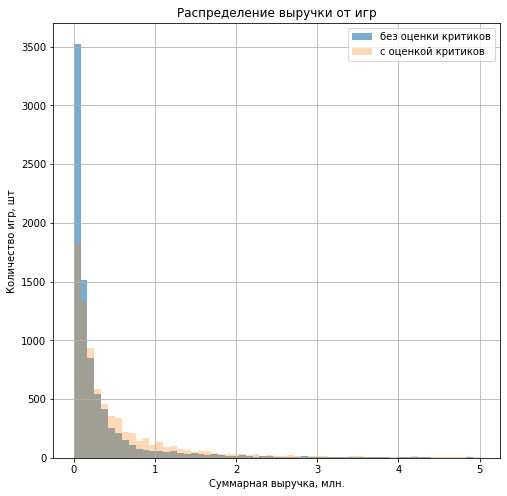

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(8,8))
        
x = df_nan_critical['sum_sales']
y = df_non_nan_critical['sum_sales']
        
bins = np.linspace(0, 5, 60)
plt.hist(x, bins, alpha=0.6, label='без оценки критиков')
plt.hist(y, bins, alpha=0.3, label='с оценкой критиков')
        
plt.grid(True)
plt.title('Распределение выручки от игр')
plt.legend(loc='upper right')
plt.xlabel('Суммарная выручка, млн.')
plt.ylabel('Количество игр, шт')
plt.show()

##### Немного приблизим. Посмотрим детальнее на выручку от игр в сегменте до 500 тыс.

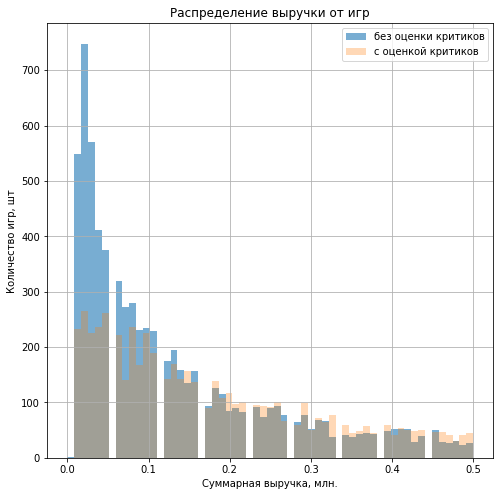

In [64]:
plt.figure(figsize=(8,8))
        
x = df_nan_critical['sum_sales']
y = df_non_nan_critical['sum_sales']
        
bins = np.linspace(0, 0.5, 60)
plt.hist(x, bins, alpha=0.6, label='без оценки критиков')
plt.hist(y, bins, alpha=0.3, label='с оценкой критиков')
        
plt.grid(True)
plt.title('Распределение выручки от игр')
plt.legend(loc='upper right')
plt.xlabel('Суммарная выручка, млн.')
plt.ylabel('Количество игр, шт')
plt.show()

##### Посмотрим на зависимость пропусков в  `critic_score`  от количества платформ, на которых эта игра была

In [65]:
df_non_nan_critical.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15521,Tenkai Knights: Brave Battle,3DS,2014,Action,0.01,0.01,0.00,0.00,26.0,2.4,E10+,0.02
9470,Drakengard 2,PS2,2005,Role-Playing,0.06,0.05,0.00,0.02,58.0,5.5,M,0.13
9669,NHL 2K7,PS3,2006,Sports,0.11,0.00,0.00,0.01,79.0,6.6,E10+,0.12
10253,Smash Court Tennis 3,X360,2007,Sports,0.08,0.02,0.00,0.01,55.0,NaN,E,0.11
5497,Disgaea 2: Cursed Memories,PS2,2006,Role-Playing,0.09,0.07,0.15,0.02,84.0,6.4,T,0.33


In [66]:
df_non_nan_critical_piv = df_non_nan_critical.groupby(['name'])\
                  .agg({'platform':'count'})\
                  .reset_index()\
                  .rename(columns={'platform':'platform_count'})

df_nan_critical_piv = df_nan_critical.groupby(['name'])\
                  .agg({'platform':'count'})\
                  .reset_index()\
                  .rename(columns={'platform':'platform_count'})

In [67]:
df_non_nan_critical_piv['platform_count'].mean()

1.5878848063555113

In [68]:
df_nan_critical_piv['platform_count'].mean()

1.2043806001991182

##### Посмтрим на зависимость  пропусков в `critic_score`  от года выпуска игры

In [69]:
df_non_nan_critical['year_of_release'].describe()

count    7995.000000
mean     2007.188493
std         4.189753
min      1985.000000
25%      2004.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

### Вывод по пропускам в столбцах `critic_score`,	`user_score`  и `rating` :<a id="conc_nans_1"></a>
- Оценки от критиков и пользователей не имеют игры, которые плохо продавались, были непопулярны и были адаптированы под меньшее кол-во платфором, что вполне логично;
- Зависимости отсутствия оценок от года выпуска игры нет.
- Аналогичные выводы можно сделать и по пропускам в столбце `rating`.

### Изучим пропуски в столбце `rating` <a id="r_nan"></a>

In [70]:
df_nan_rating = df_non_nan_year[df_non_nan_year['rating'].isna()]

In [71]:
display(df_nan_rating.sample(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
5643,Frankenstein's Monster,2600,1982,Action,0.30,0.02,0.00,0.00,NaN,NaN,NaN,0.32
4615,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,0.30,0.11,0.00,0.01,NaN,NaN,NaN,0.42
13952,Dynasty Warriors Vol. 2 (JP sales),PSP,2006,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
14586,D.C.I.F.: Da Capo Innocent Finale,PS2,2009,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
10436,Jikkyou Powerful Pro Yakyuu 10,GC,2003,Sports,0.00,0.00,0.10,0.00,NaN,NaN,NaN,0.10
14582,Hiiro no Kakera: Shin Tamayori Hime Denshou - ...,PSP,2011,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
7727,MLB 16: The Show,PS3,2016,Action,0.16,0.00,0.00,0.04,NaN,NaN,NaN,0.20
4980,Jam Sessions: Sing and Play Guitar (US sales),DS,2007,Misc,0.38,0.00,0.00,0.00,NaN,NaN,NaN,0.38
14646,Mahjong Kakutou Club: Zenkoku Taisenban,PS3,2006,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
14368,Summon Night 6: Lost Borders,PS4,2016,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


## III. Анализ данных <a id="third"></a>

### Посмотрим, сколько игр выпускалось в разные годы, и определим, важны ли данные за все периоды <a id="year_sales"></a>

In [72]:
df_games = df_non_nan_year.groupby(
    'year_of_release')['name'].agg(['count']).sort_values(by=['year_of_release']).reset_index()

In [73]:
df_games

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


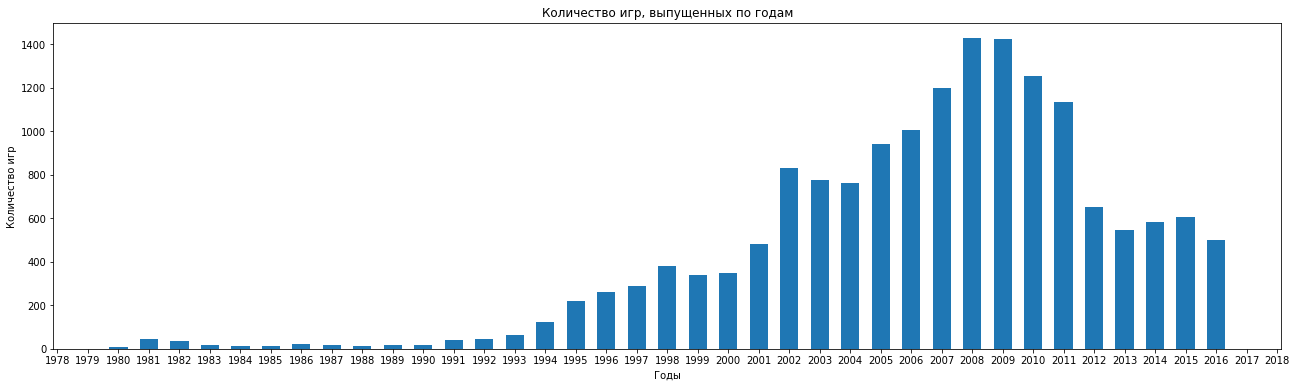

In [74]:
x = df_games['year_of_release']
y = df_games['count']

fig, ax = plt.subplots()

ax.bar(x, y, width = 0.6)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

fig.set_figwidth(22)
fig.set_figheight(6)

plt.title('Количество игр, выпущенных по годам')
plt.xlabel('Годы')
plt.ylabel('Количество игр')
plt.show()

### Вывод по количеству игр, выпущенных в разные годы: <a id="conc_games_y"></a>
- Мы наблюдаем стремительный рост производства игр с начала 90х до 2009-ого года, после чего тренд ломается, и идет резкое снижение вплоть до 2012;
- В данном разрезе нам видится наиболее релевантным для прогноза период с 2012 по 2016;
- Чтобы определиться окночательно, нужно изучить данные в других разрезах.

### Посмотрим, как менялись продажи по платформам:  <a id="platform_sales"></a>
- Выберем платформы с наибольшими суммарными продажами и построим распределение по годам;
- Определим, за какой характерный срок появляются новые и исчезают старые платформы.

In [75]:
df_platforms = df_non_nan_year.groupby(['platform', 'year_of_release'])\
                  .agg({'name':'count', 'sum_sales':'sum'})\
                  .rename(columns={'name':'games_count'})\
                  .sort_values(by=['sum_sales'], ascending=False)\
                  .reset_index()

In [76]:
df_platforms.describe()

,year_of_release,games_count,sum_sales
count,238.000000,238.000000,238.000000
mean,2002.474790,69.172269,37.113992
std,9.030036,84.868773,48.663674
min,1980.000000,1.000000,0.020000
25%,1996.000000,6.000000,3.620000
50%,2003.000000,33.500000,16.055000
75%,2010.000000,106.000000,50.477500
max,2016.000000,492.000000,212.130000


In [77]:
display(df_platforms.head(30))

,platform,year_of_release,games_count,sum_sales
0,PS2,2004,260,212.13
1,PS2,2002,282,207.00
2,Wii,2009,325,206.97
3,PS2,2003,258,193.05
4,Wii,2008,282,171.32
5,X360,2010,183,170.08
6,PS,1998,248,169.49
7,PS2,2001,185,166.43
8,PS2,2005,262,163.70
9,PS3,2011,215,156.78


In [78]:
df_platforms_top_30_sales = df_platforms.head(30)
df_platforms_top_30_sales['platform'].unique()

array(['PS2', 'Wii', 'X360', 'PS', 'PS3', 'DS', 'PS4'], dtype=object)

##### Посмотрим продажи нашего топ 30 по годам

In [79]:
unique_plat_30 = sorted(list(df_platforms_top_30_sales['platform'].unique()))
for plat in unique_plat_30:
    display(df_platforms.query('platform == @plat'))   

,platform,year_of_release,games_count,sum_sales
11,DS,2007,377,146.95
12,DS,2008,492,145.31
20,DS,2005,118,130.14
23,DS,2006,201,119.81
24,DS,2009,403,119.54
36,DS,2010,323,85.02
96,DS,2011,153,26.18
113,DS,2004,23,17.27
134,DS,2012,23,11.01
193,DS,2013,8,1.54


,platform,year_of_release,games_count,sum_sales
6,PS,1998,248,169.49
13,PS,1999,200,144.53
17,PS,1997,188,136.17
32,PS,2000,160,96.37
34,PS,1996,164,94.70
76,PS,1995,99,35.96
78,PS,2001,91,35.59
153,PS,2002,20,6.67
157,PS,1994,17,6.03
190,PS,2003,3,2.07


,platform,year_of_release,games_count,sum_sales
0,PS2,2004,260,212.13
1,PS2,2002,282,207.00
3,PS2,2003,258,193.05
7,PS2,2001,185,166.43
8,PS2,2005,262,163.70
29,PS2,2006,259,103.42
38,PS2,2007,214,75.99
54,PS2,2008,191,53.90
71,PS2,2000,82,39.17
94,PS2,2009,96,26.40


,platform,year_of_release,games_count,sum_sales
9,PS3,2011,215,156.78
15,PS3,2010,181,142.17
19,PS3,2009,162,130.93
26,PS3,2008,138,118.52
27,PS3,2013,126,113.25
28,PS3,2012,148,107.36
40,PS3,2007,90,73.19
64,PS3,2014,108,47.76
107,PS3,2006,27,20.96
115,PS3,2015,73,16.82


,platform,year_of_release,games_count,sum_sales
25,PS4,2015,137,118.90
30,PS4,2014,75,100.00
41,PS4,2016,164,69.25
99,PS4,2013,16,25.99


,platform,year_of_release,games_count,sum_sales
2,Wii,2009,325,206.97
4,Wii,2008,282,171.32
10,Wii,2007,185,152.77
16,Wii,2006,44,137.15
21,Wii,2010,253,127.95
47,Wii,2011,143,59.65
105,Wii,2012,31,21.71
143,Wii,2013,12,8.59
176,Wii,2014,6,3.75
197,Wii,2015,4,1.14


,platform,year_of_release,games_count,sum_sales
5,X360,2010,183,170.08
14,X360,2011,206,143.84
18,X360,2008,146,135.26
22,X360,2009,172,120.29
31,X360,2012,106,99.74
33,X360,2007,123,95.41
35,X360,2013,75,88.58
57,X360,2006,94,51.63
83,X360,2014,63,34.74
128,X360,2015,35,11.96


In [80]:
ps = df_platforms.query('platform == "PS"').groupby(['year_of_release'])\
                          .agg({'sum_sales':'sum'})\
                          .reset_index()
ps2 = df_platforms.query('platform == "PS2"').groupby(['year_of_release'])\
                          .agg({'sum_sales':'sum'})\
                          .reset_index()                                                        
ps3 = df_platforms.query('platform == "PS3"').groupby(['year_of_release'])\
                          .agg({'sum_sales':'sum'})\
                          .reset_index()
ps4 = df_platforms.query('platform == "PS4"').groupby(['year_of_release'])\
                          .agg({'sum_sales':'sum'})\
                          .reset_index()
ds = df_platforms.query('platform == "DS"').groupby(['year_of_release'])\
                          .agg({'sum_sales':'sum'})\
                          .reset_index()
wii = df_platforms.query('platform == "Wii"').groupby(['year_of_release'])\
                          .agg({'sum_sales':'sum'})\
                          .reset_index() 
x360 = df_platforms.query('platform == "X360"').groupby(['year_of_release'])\
                          .agg({'sum_sales':'sum'})\
                          .reset_index() 

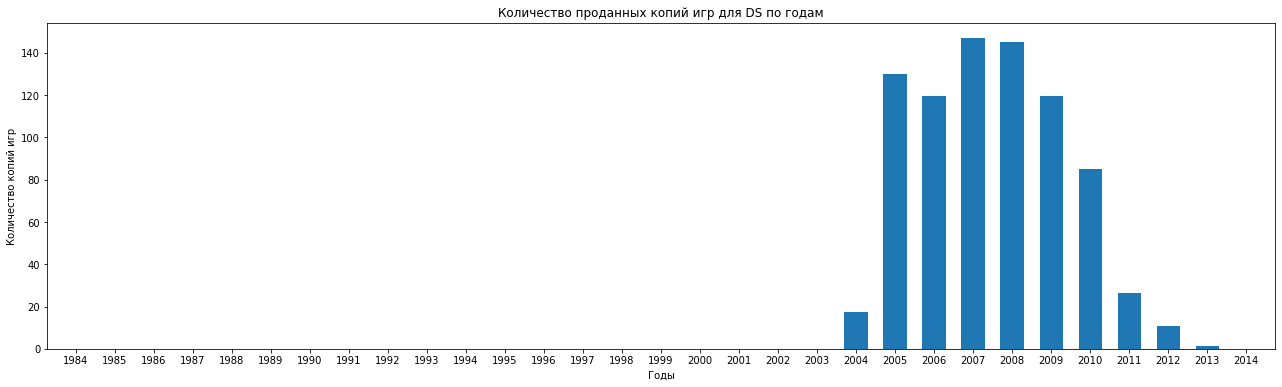

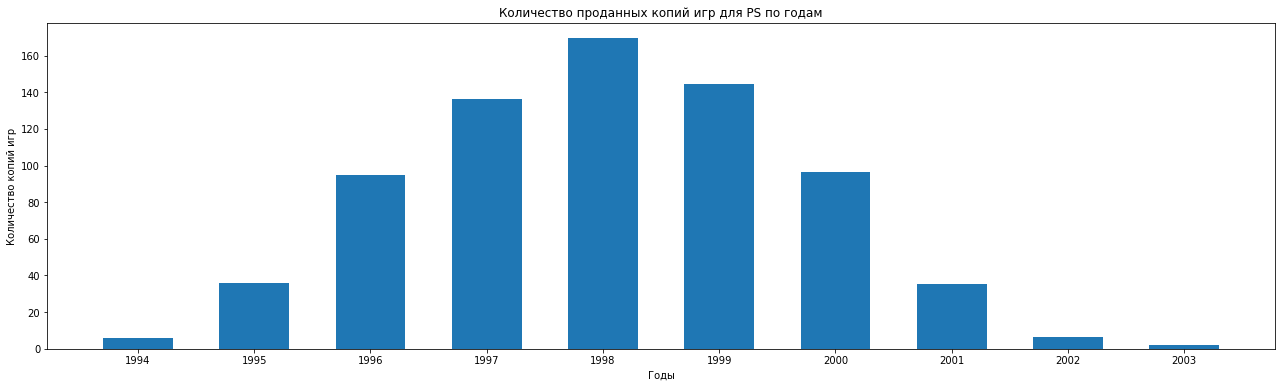

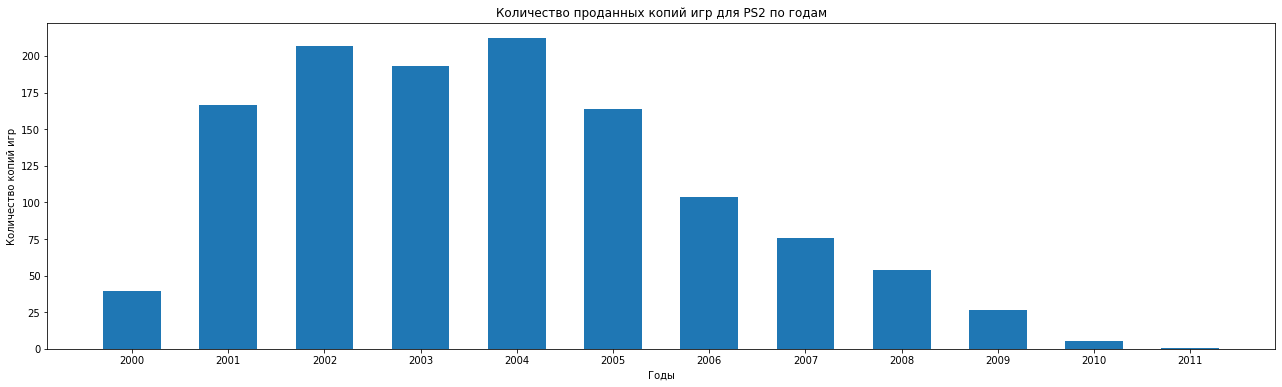

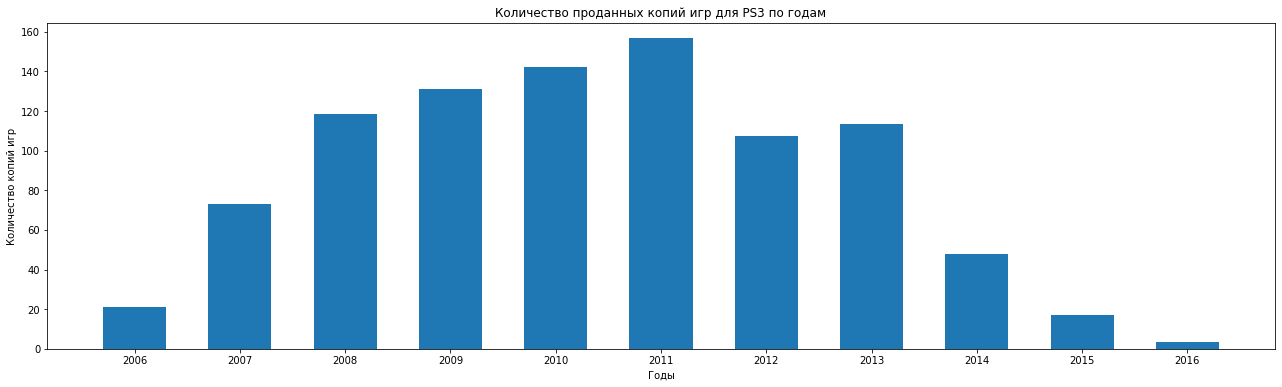

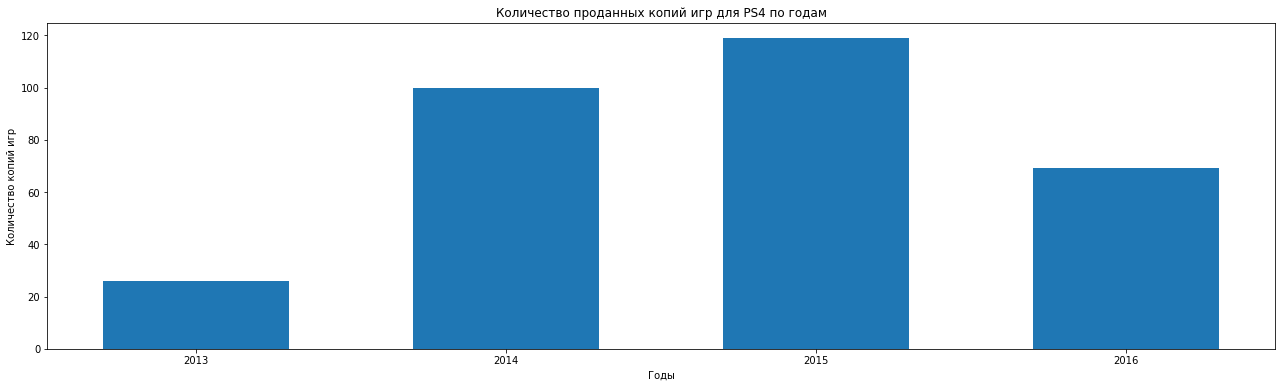

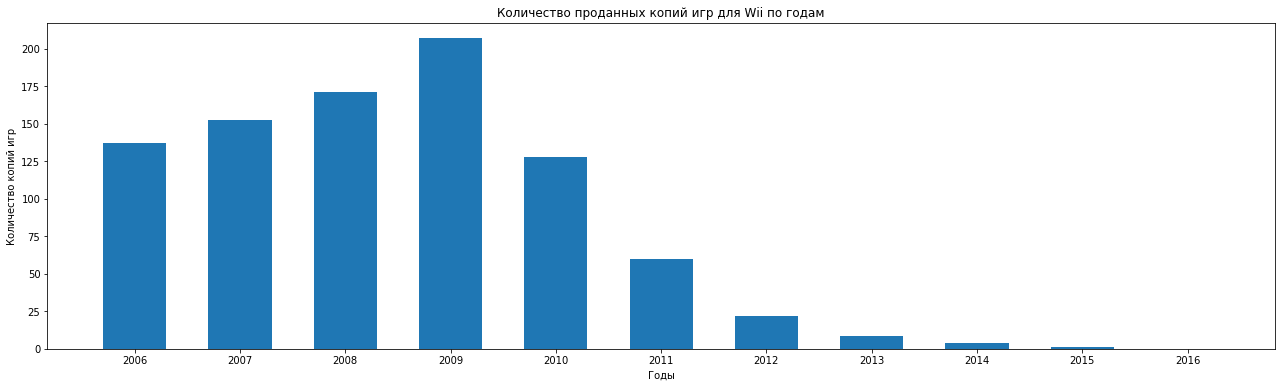

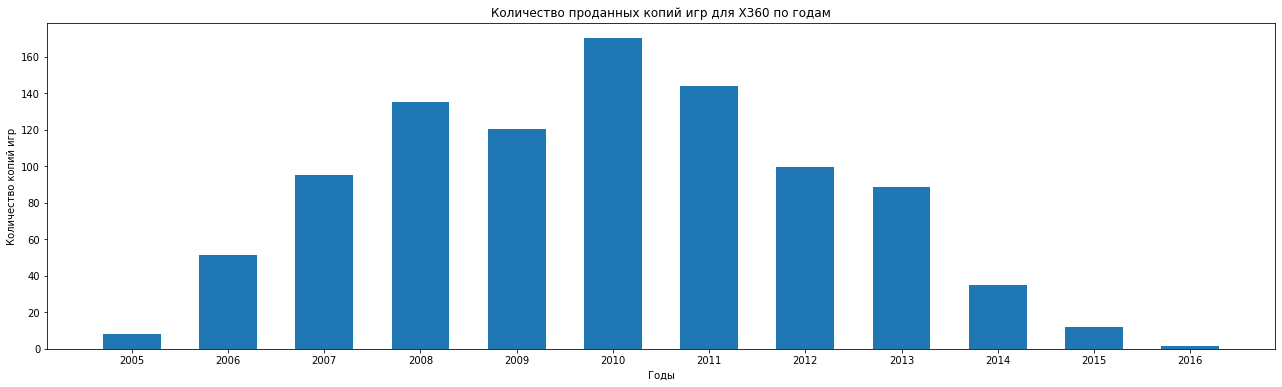

In [81]:
for plat in unique_plat_30:
    
    if plat == 'PS':
    
        x = ps['year_of_release']
        y = ps['sum_sales']

    if plat == 'PS2':
    
        x = ps2['year_of_release']
        y = ps2['sum_sales']
    
    if plat == 'PS3':
    
        x = ps3['year_of_release']
        y = ps3['sum_sales']  
        
    if plat == 'PS4':
    
        x = ps4['year_of_release']
        y = ps4['sum_sales']
    
    if plat == 'DS':
    
        x = ds['year_of_release']
        y = ds['sum_sales']
        
    if plat == 'Wii':
    
        x = wii['year_of_release']
        y = wii['sum_sales']
        
    if plat == 'X360':
    
        x = x360['year_of_release']
        y = x360['sum_sales']
    fig, ax = plt.subplots()

    ax.bar(x, y, width = 0.6)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.set_figwidth(22)
    fig.set_figheight(6)

    plt.title('Количество проданных копий игр для {} по годам'.format(plat))
    #plt.legend(loc='upper left')
    plt.xlabel('Годы')
    plt.ylabel('Количество копий игр')
    plt.show()

In [82]:
unique_plat_30

['DS', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']

### Вывод по платформам: <a id="conc_plat"></a>
- Самый большой объем проданных копий за всю ретроспективу приходится на всю линейку PS(1,2,3,4), X360, DS и Wii;
- Жизненный цикл платформы около 10 лет. Пиковые значения держатся 4-5 лет.

### Определим Актуальный период, по которму будем строить прогноз  <a id="act_per"></a>

In [83]:
df_analysis = df_non_nan_year.query('year_of_release >= 2012')

In [84]:
display(df_analysis.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
3892,Soul Sacrifice,PSV,2013,Role-Playing,0.15,0.08,0.22,0.06,77.0,8.2,M,0.51
9653,Deadpool,XOne,2015,Action,0.09,0.03,0.00,0.01,NaN,5.7,M,0.13
8769,Darksiders II,WiiU,2012,Action,0.07,0.07,0.00,0.01,85.0,8.2,M,0.15
1056,No Man's Sky,PS4,2016,Action,0.63,0.76,0.03,0.27,71.0,4.5,T,1.69
2191,Rocksmith 2014,X360,2013,Misc,0.69,0.16,0.00,0.09,NaN,NaN,NaN,0.94


In [85]:
df_analysis.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000,1313.00000,1532.000000,2887.000000
mean,2013.916176,0.204721,0.175639,0.066706,0.054105,72.26885,6.637337,0.501171
std,1.411972,0.566604,0.505260,0.241536,0.164611,12.68792,1.569243,1.248944
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.00000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.00000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.00000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.00000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.00000,9.300000,21.050000


In [86]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2887 entries, 16 to 16714
Data columns (total 12 columns):
name               2887 non-null object
platform           2887 non-null object
year_of_release    2887 non-null int64
genre              2887 non-null object
na_sales           2887 non-null float64
eu_sales           2887 non-null float64
jp_sales           2887 non-null float64
other_sales        2887 non-null float64
critic_score       1313 non-null float64
user_score         1532 non-null float64
rating             1612 non-null object
sum_sales          2887 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.2+ KB


### Вывод по Актуальному периоду: <a id="conc_act_per"></a>
Мы оставили данные для дальнейшего анализа с 2012 по 2016 год включительно. Это связано с тем, что за эти годы стабилизировлася тренд по количеству проданных копий, и это примерно половина среднего срока жизненного цикла платформы.
Данные для анализа мы сохранили в переменную df_analysis

### Определим, какие платформы лидируют по продажам. <a id="plat_sales"></a> 
- Посмотрим, какие из них растут или падают; 
- Выберем несколько потенциально прибыльных платформ.

##### Посмтрим на лидеров индустрии последних 5 лет.

In [87]:
df_analysis_top_sales = df_analysis.groupby(['platform'])\
                  .agg({'name':'count', 'sum_sales':'sum'})\
                  .rename(columns={'name':'games_count'})\
                  .sort_values(by=['sum_sales'], ascending=False)\
                  .reset_index()

In [88]:
df_analysis_top_sales

,platform,games_count,sum_sales
0,PS4,392,314.14
1,PS3,493,288.79
2,X360,292,236.54
3,3DS,396,194.61
4,XOne,247,159.32
5,WiiU,147,82.19
6,PC,251,63.00
7,PSV,411,49.18
8,Wii,54,35.37
9,DS,31,12.55


##### Посмтрим кто расет, а кто падает

Продажа копий игр для платформы 3DS по годам


,year_of_release,sum_sales
0,2011,63.20
1,2012,51.36
2,2013,56.57
3,2014,43.76
4,2015,27.78
5,2016,15.14


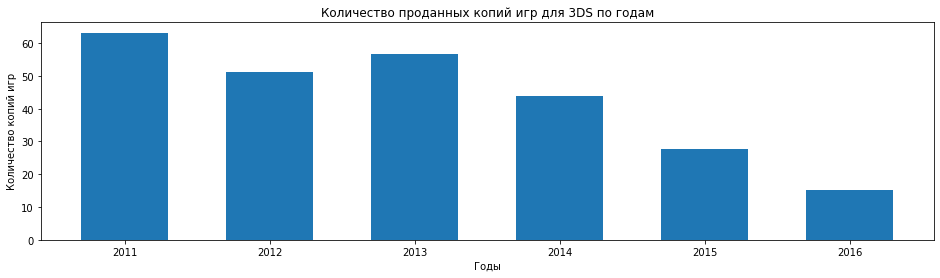

Продажа копий игр для платформы DS по годам


,year_of_release,sum_sales
0,1985,0.02
1,2004,17.27
2,2005,130.14
3,2006,119.81
4,2007,146.95
5,2008,145.31
6,2009,119.54
7,2010,85.02
8,2011,26.18
9,2012,11.01


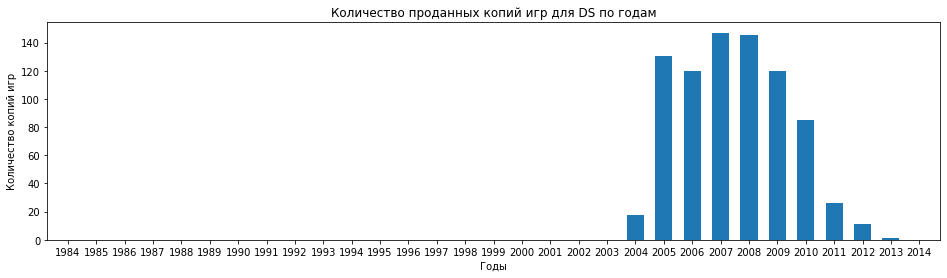

Продажа копий игр для платформы PC по годам


,year_of_release,sum_sales
0,1985,0.04
1,1988,0.03
2,1992,3.03
3,1994,12.87
4,1995,4.22
5,1996,10.58
6,1997,11.27
7,1998,3.26
8,1999,4.74
9,2000,4.66


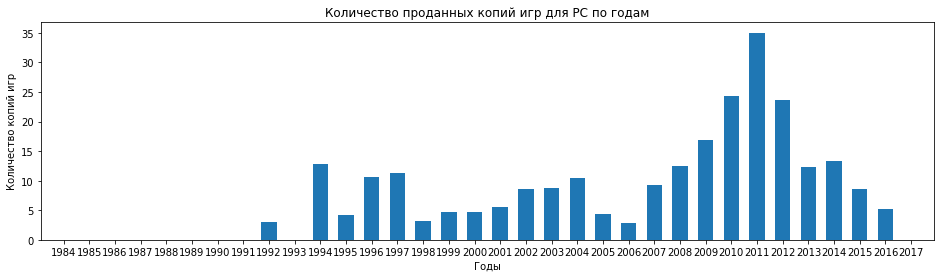

Продажа копий игр для платформы PS3 по годам


,year_of_release,sum_sales
0,2006,20.96
1,2007,73.19
2,2008,118.52
3,2009,130.93
4,2010,142.17
5,2011,156.78
6,2012,107.36
7,2013,113.25
8,2014,47.76
9,2015,16.82


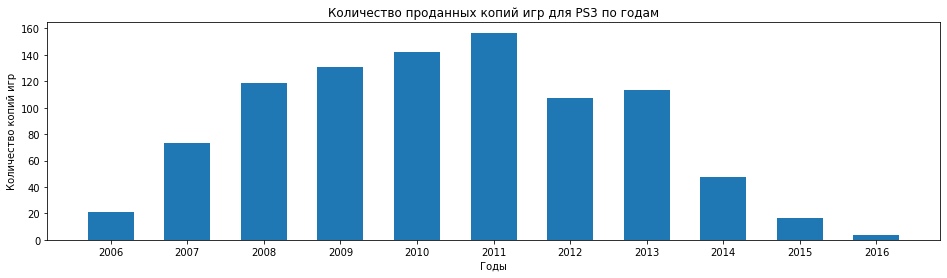

Продажа копий игр для платформы PS4 по годам


,year_of_release,sum_sales
0,2013,25.99
1,2014,100.00
2,2015,118.90
3,2016,69.25


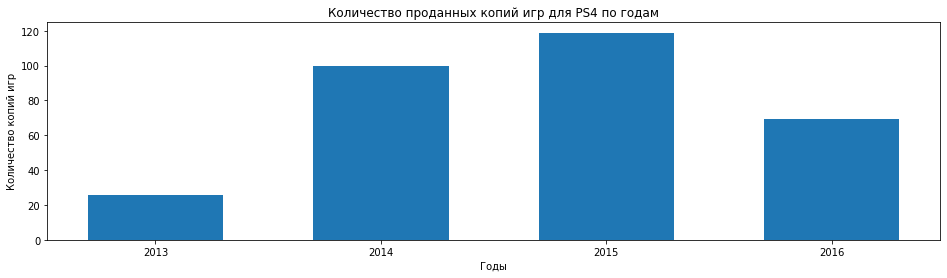

Продажа копий игр для платформы PSP по годам


,year_of_release,sum_sales
0,2004,7.06
1,2005,43.84
2,2006,55.32
3,2007,46.94
4,2008,35.35
5,2009,37.78
6,2010,35.04
7,2011,17.82
8,2012,7.69
9,2013,3.14


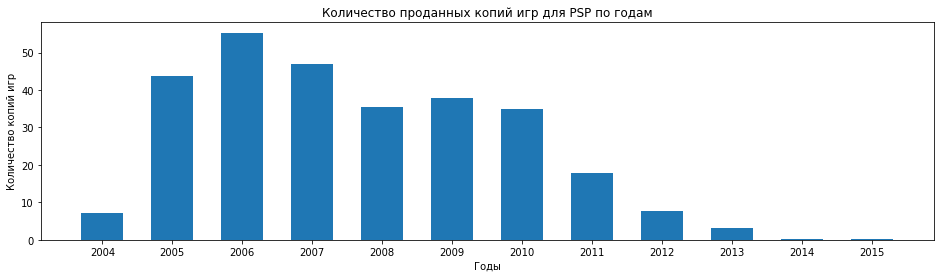

Продажа копий игр для платформы PSV по годам


,year_of_release,sum_sales
0,2011,4.63
1,2012,16.19
2,2013,10.59
3,2014,11.90
4,2015,6.25
5,2016,4.25


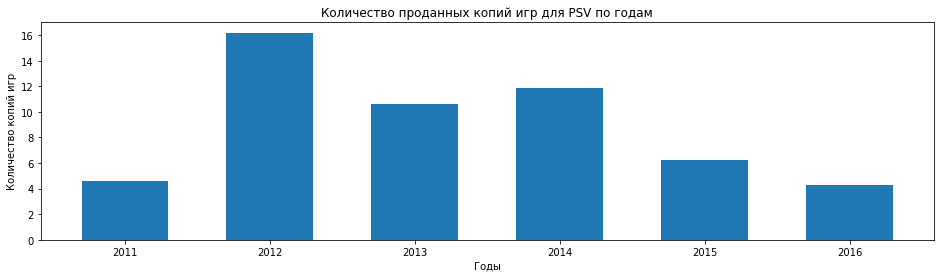

Продажа копий игр для платформы Wii по годам


,year_of_release,sum_sales
0,2006,137.15
1,2007,152.77
2,2008,171.32
3,2009,206.97
4,2010,127.95
5,2011,59.65
6,2012,21.71
7,2013,8.59
8,2014,3.75
9,2015,1.14


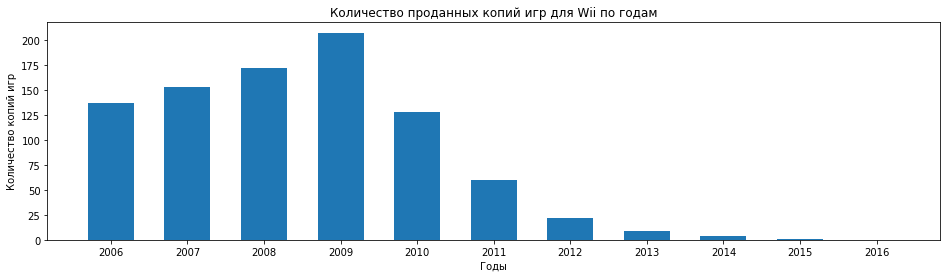

Продажа копий игр для платформы WiiU по годам


,year_of_release,sum_sales
0,2012,17.56
1,2013,21.65
2,2014,22.03
3,2015,16.35
4,2016,4.60


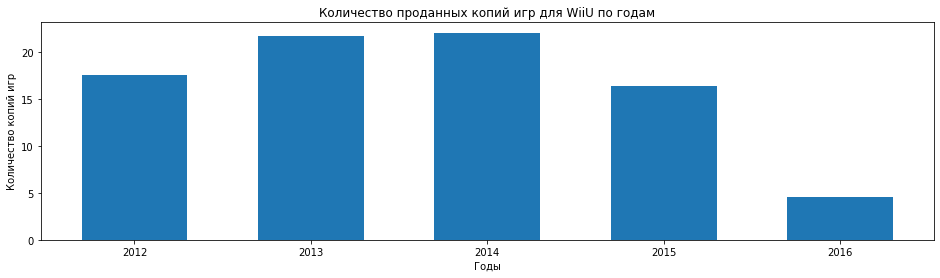

Продажа копий игр для платформы X360 по годам


,year_of_release,sum_sales
0,2005,8.25
1,2006,51.63
2,2007,95.41
3,2008,135.26
4,2009,120.29
5,2010,170.08
6,2011,143.84
7,2012,99.74
8,2013,88.58
9,2014,34.74


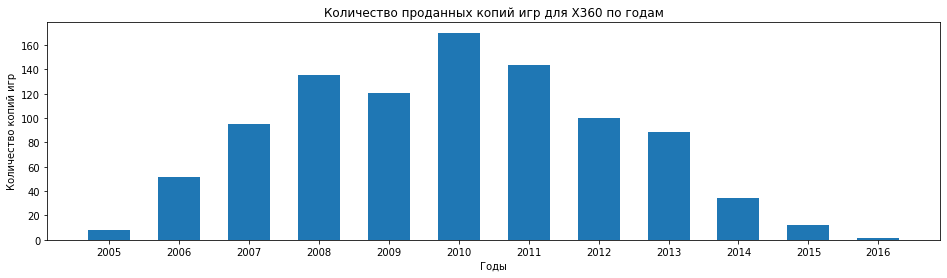

Продажа копий игр для платформы XOne по годам


,year_of_release,sum_sales
0,2013,18.96
1,2014,54.07
2,2015,60.14
3,2016,26.15


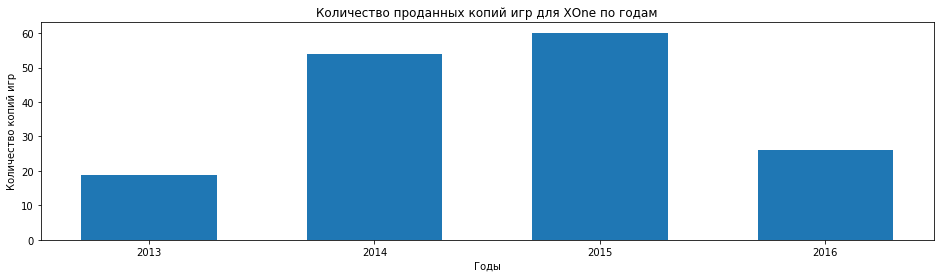

In [89]:
unique_plat_10 = sorted(list(df_analysis_top_sales['platform'].unique()))
for plat in unique_plat_10:
    print('Продажа копий игр для платформы {} по годам'.format(plat))
    df_for_plot = df_platforms.query('platform == @plat').groupby(['year_of_release'])\
                          .agg({'sum_sales':'sum'})\
                          .sort_values(by=['year_of_release'])\
                          .reset_index()
    display(df_for_plot)
    
    x = df_for_plot['year_of_release']
    y = df_for_plot['sum_sales']
    fig, ax = plt.subplots()

    ax.bar(x, y, width = 0.6)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.set_figwidth(16)
    fig.set_figheight(4)

    plt.title('Количество проданных копий игр для {} по годам'.format(plat))
    #plt.legend(loc='upper left')
    plt.xlabel('Годы')
    plt.ylabel('Количество копий игр')
    plt.show()

### Вывод по актуальным лидерам: <a id="conc_act_top"></a>
- Лидерами продаж являются: PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, DS, PSP;
- Несмотря на разношерстный топ, у большинства из платформ точек роста больше нет, так как их жизненный цикл подходит к концу. К тому же общий снижающийся тренд не позволяет выделить много лидеров.
- Несмотря на спад в 2016 году, наиболее привлекательными выглядят свежие игорки: PS4 и X0ne. Их продажи неплохо росли до 2016 года.
По одному году снижения судить не стоит, поэтому выделим именно их.

### Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам <a id="mustache"></a>

In [90]:
df_analysis_for_box_plot = df_analysis.groupby(['platform'])\
                  .agg({'sum_sales':'sum'})\
                  .sort_values(by=['sum_sales'], ascending=False)\
                  .reset_index()

In [91]:
df_analysis_for_box_plot

,platform,sum_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,63.00
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


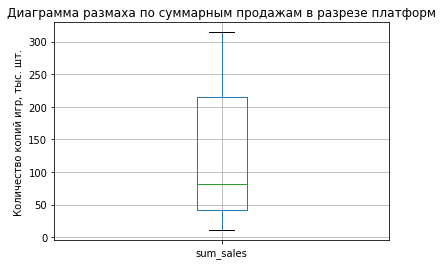

In [92]:
import matplotlib.pyplot as plt

df_analysis_for_box_plot = df_analysis.groupby(['platform'])\
                  .agg({'sum_sales':'sum'})\
                  .reset_index()
    
df_analysis_for_box_plot.boxplot()
    
plt.title('Диаграмма размаха по суммарным продажам в разрезе платформ')
plt.ylabel('Количество копий игр, тыс. шт.')
fig.set_figwidth(10)
fig.set_figheight(4)
plt.show()


In [93]:
df_analysis_for_box_plot.sort_values(by='sum_sales', ascending=False)

,platform,sum_sales
4,PS4,314.14
3,PS3,288.79
9,X360,236.54
0,3DS,194.61
10,XOne,159.32
8,WiiU,82.19
2,PC,63.00
6,PSV,49.18
7,Wii,35.37
1,DS,12.55


In [94]:
df_analysis_for_box_plot['sum_sales'].describe()

count     11.000000
mean     131.534545
std      112.094875
min       11.190000
25%       42.275000
50%       82.190000
75%      215.575000
max      314.140000
Name: sum_sales, dtype: float64

### Комментарий к диаграмме распределения <a id="mustache_conc"></a>
- C 2012 по 2016 год для топ-10 платформ в среднем было продано 131 тыс. копий игр; медианное значение: 82 тыс. копии игр;
- Большая часть значений лежит в диапозоне от 42 до 215 тыс копий;
- Низким суммарный объем продаж можно считать тот, что лежит в первом квартиле (до 42 тыс. копий): Wii, DS и PSP;
- Рекордсменами же можно считать тех, для чьей платформы было продано свыше 215 тыс копий: X360, PS3 и PS4.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков <a id="sales_score"></a>
- Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами;
- Соотнесем выводы с продажами игр на других платформах;
- Сформулируем выводы.

##### Напишем цикл, чтобы ускорить вычисления

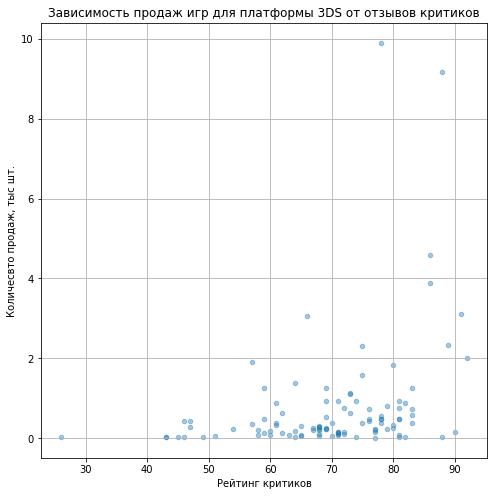

Коэфециент кореляции с critic_score : 0.32080286953607845


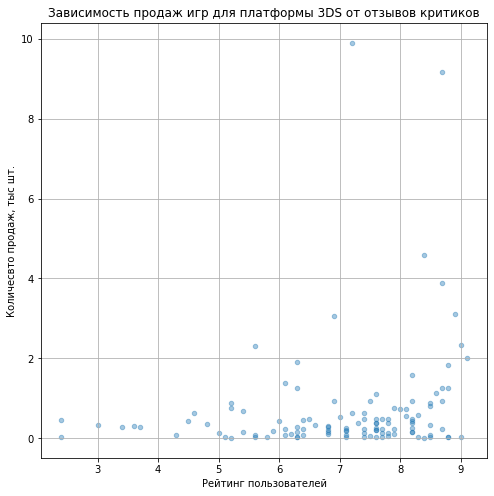

Коэфециент кореляции с user_score : 0.19758263411038596


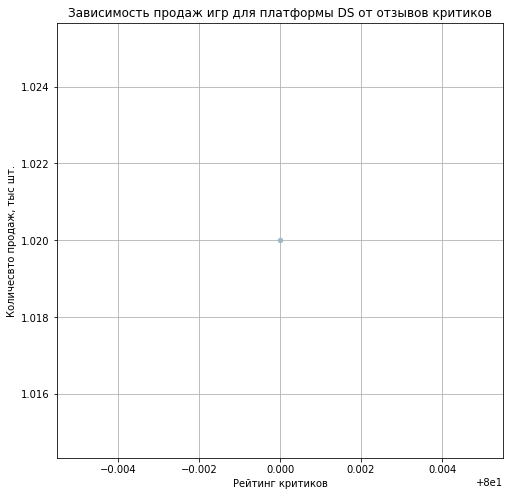

Коэфециент кореляции с critic_score : nan


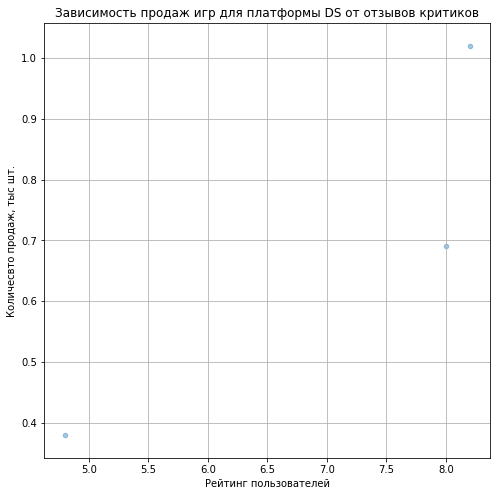

Коэфециент кореляции с user_score : 0.88270872757644


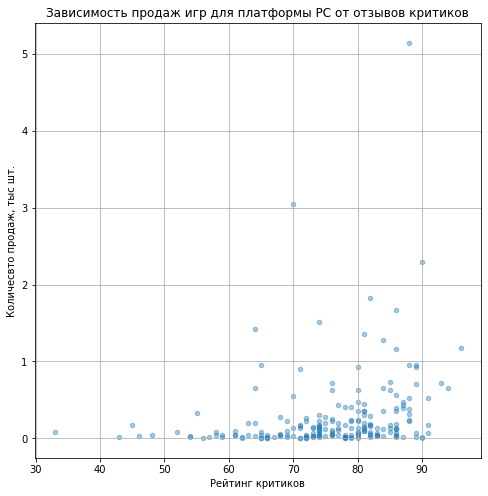

Коэфециент кореляции с critic_score : 0.23723944902429162


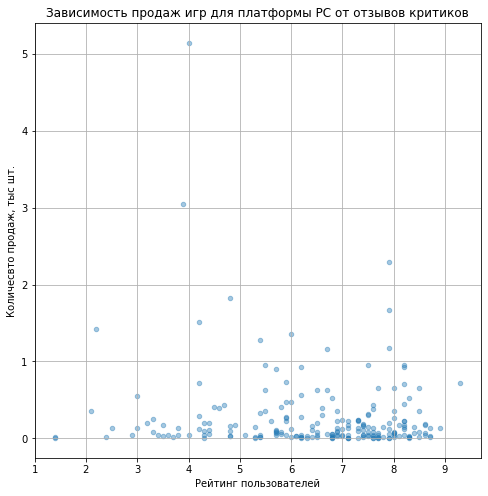

Коэфециент кореляции с user_score : -0.12059492333208117


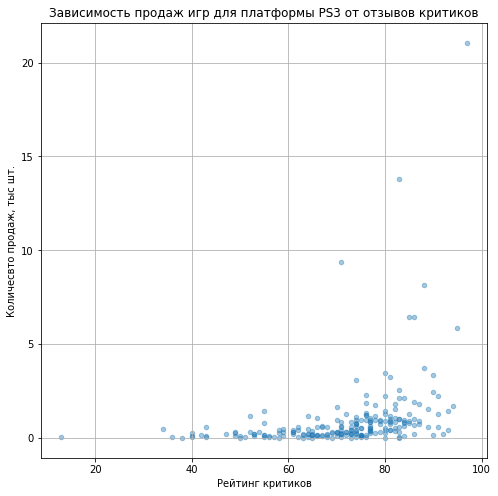

Коэфециент кореляции с critic_score : 0.3314972592629587


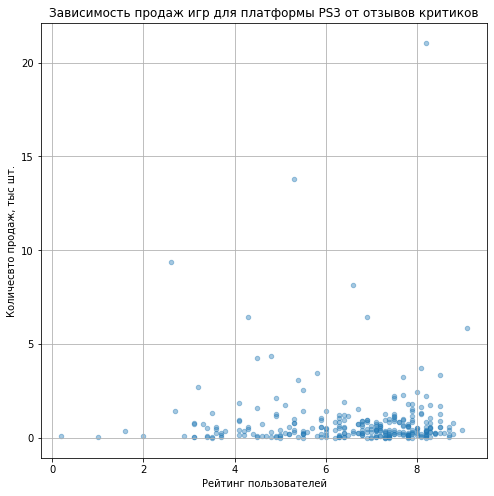

Коэфециент кореляции с user_score : -0.005143522887113816


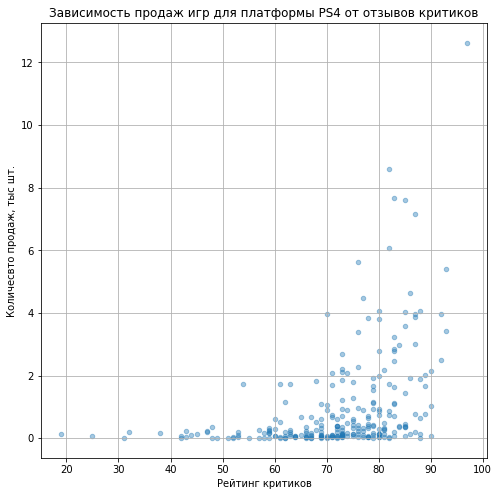

Коэфециент кореляции с critic_score : 0.406567902061781


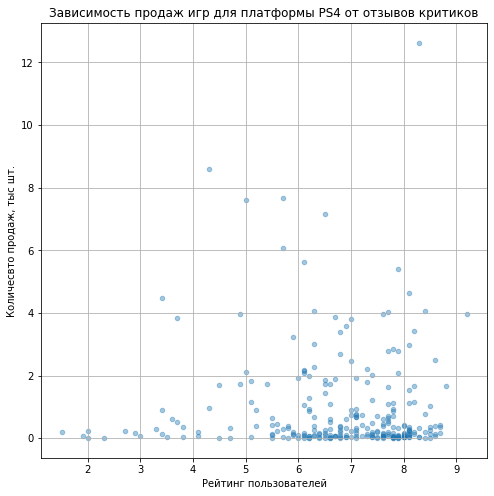

Коэфециент кореляции с user_score : -0.031957110204556424


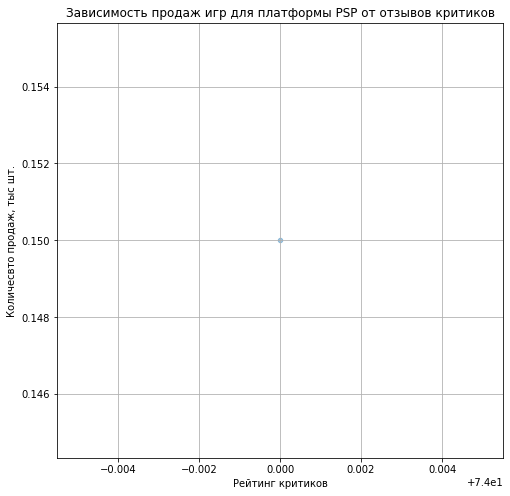

Коэфециент кореляции с critic_score : nan


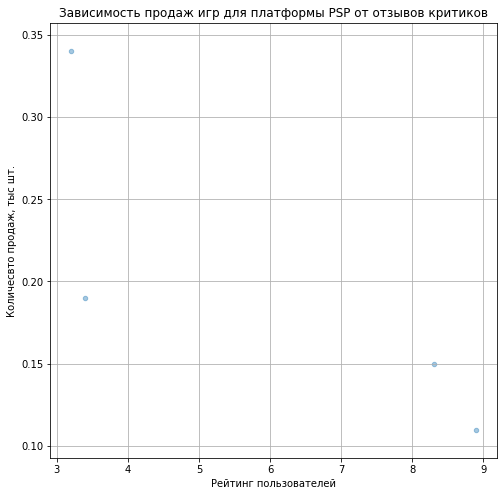

Коэфециент кореляции с user_score : -0.802302061939321


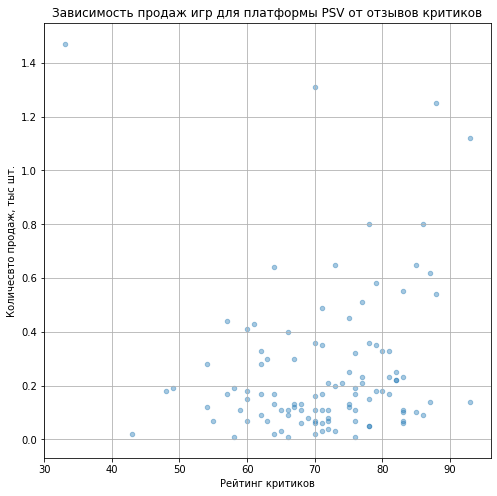

Коэфециент кореляции с critic_score : 0.09448789929316172


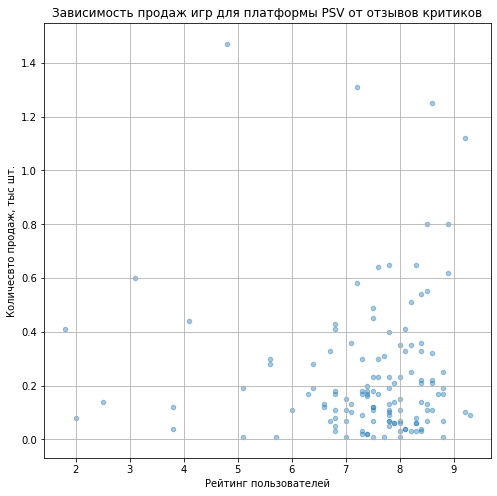

Коэфециент кореляции с user_score : -0.004339437514314869


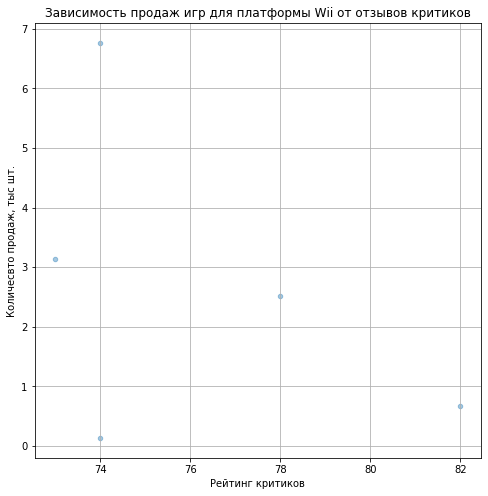

Коэфециент кореляции с critic_score : -0.4243413011077495


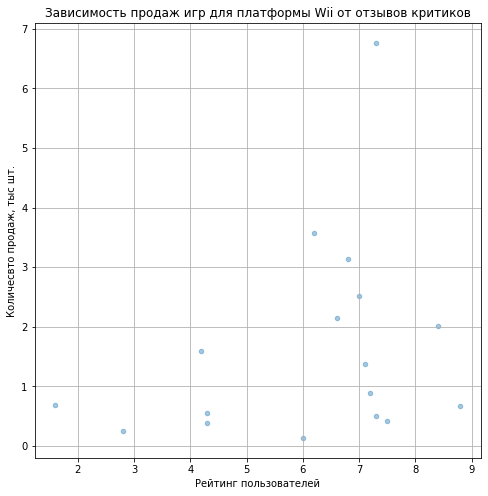

Коэфециент кореляции с user_score : 0.2961968000747953


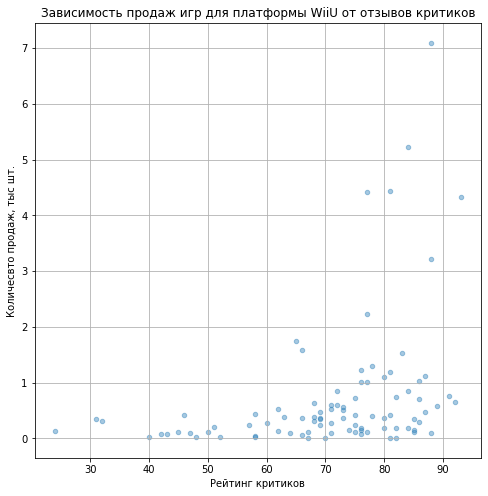

Коэфециент кореляции с critic_score : 0.3483797601201749


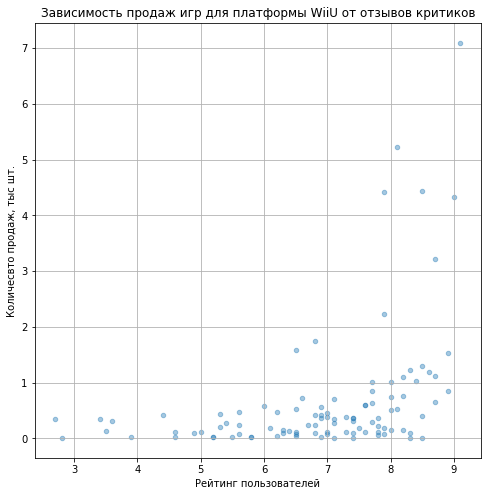

Коэфециент кореляции с user_score : 0.4002190202148617


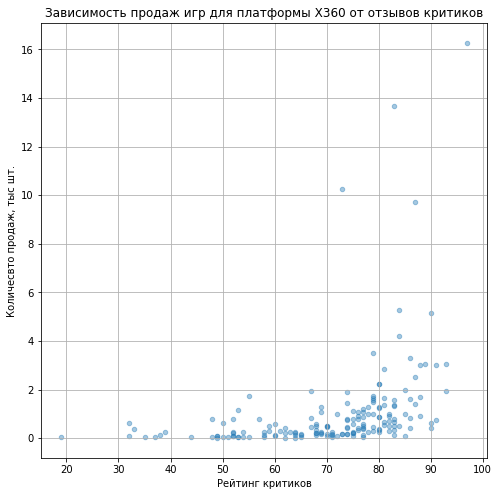

Коэфециент кореляции с critic_score : 0.36057348885073365


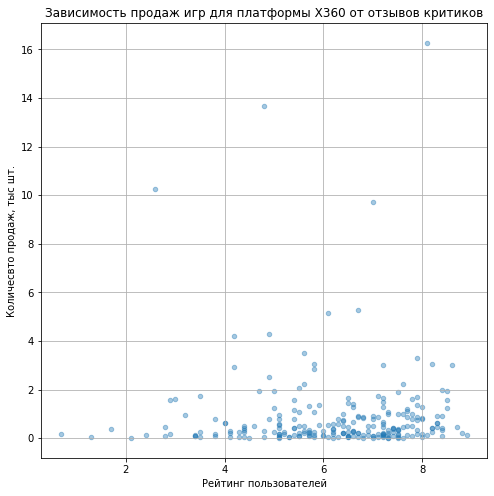

Коэфециент кореляции с user_score : 0.0061639786462133256


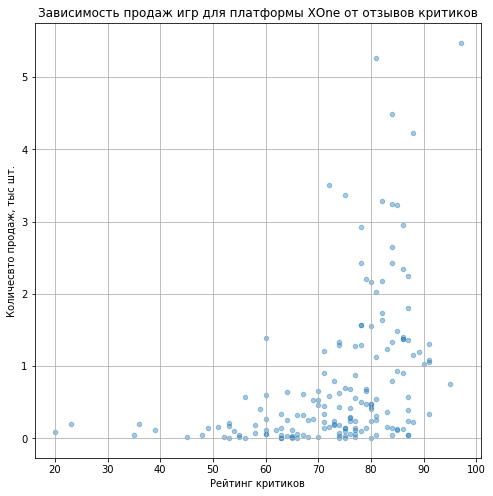

Коэфециент кореляции с critic_score : 0.41699832800840175


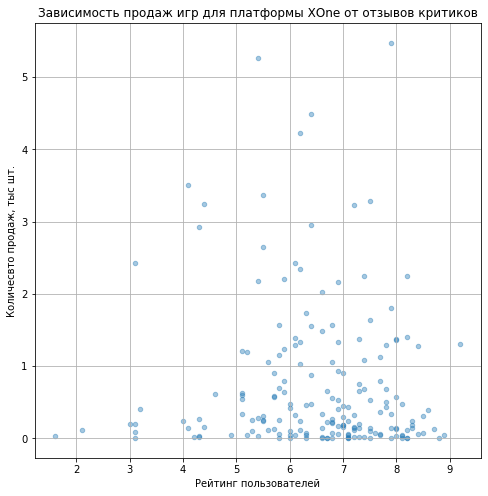

Коэфециент кореляции с user_score : -0.06892505328279412


In [95]:
for plat in unique_plat_10:
    df_analysis_plot = df_analysis.query('platform == @plat')
    for column in df_analysis_plot[['platform', 'critic_score', 'user_score', 'sum_sales']]:
        if column == 'critic_score':
        
            df_analysis_plot.plot(x=column, y='sum_sales', kind='scatter', alpha=(0.4), figsize=(8, 8))
            plt.grid(True)
            plt.title('Зависимость продаж игр для платформы {} от отзывов критиков'.format(plat))
            plt.xlabel('Рейтинг критиков')
            plt.ylabel('Количесвто продаж, тыс шт.')
            plt.show()
            
            print('Коэфециент кореляции с', column,':', (df_analysis_plot['sum_sales'].corr(df_analysis_plot[column])))
            
        if column == 'user_score':

            df_analysis_plot.plot(x=column, y='sum_sales', kind='scatter', alpha=(0.4), figsize=(8, 8))
            plt.grid(True)
            plt.title('Зависимость продаж игр для платформы {} от отзывов критиков'.format(plat))
            plt.xlabel('Рейтинг пользователей')
            plt.ylabel('Количесвто продаж, тыс шт.')
            plt.show()
            
            print('Коэфециент кореляции с', column,':', (df_analysis_plot['sum_sales'].corr(df_analysis_plot[column])))

##### По некоторым платформам сложно посчитать корреляцию, так как по ним совершенно нет отзывов

In [96]:
df_analysis.query('platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
83,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,2.79,1.72,3.14,0.41,NaN,NaN,NaN,8.06
2039,Pokemon Conquest,DS,2012,Role-Playing,0.56,0.05,0.37,0.04,80.0,8.2,E,1.02
2963,LEGO Batman 2: DC Super Heroes,DS,2012,Action,0.39,0.24,0.00,0.06,NaN,8.0,E10+,0.69
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN,0.51
4845,Moshi Monsters: Moshlings Theme Park,DS,2012,Misc,0.03,0.33,0.00,0.04,NaN,NaN,E,0.40
5054,LEGO Marvel Super Heroes,DS,2013,Action,0.22,0.13,0.00,0.03,NaN,4.8,E10+,0.38
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.00,0.02,NaN,NaN,E,0.21
7671,The Amazing Spider-Man (Console Version),DS,2012,Action,0.15,0.03,0.00,0.01,NaN,NaN,NaN,0.19
7993,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.00,0.01,NaN,NaN,E,0.18
9311,LEGO The Lord of the Rings,DS,2012,Action,0.00,0.12,0.00,0.01,NaN,NaN,E10+,0.13


### Вывод по зависимости количества продаж от отзывов: <a id="corr_sales"></a>
- По более популярным платформам зависимость есть. Не всегда строго линейная, но есть. Отсюда не всегда выский коэффециент корреляции Пирсона. 
    - Для PSP4: корреляция с рейтингом пользователей 0,31, а с рейтингом критиков 0,41;
    - Для X0ne: корреляция с рейтингом пользователей 0,06, а с рейтингом критиков 0,41;
    - Схожую завимимость можно наблюдать у PS3, X360 и PC;
    - А вот у нишевых портативных PSV и PSP такой зависимости нет из-за недостаточного кол-ва отзывов;
- По таким плаформам как Wii, PSP и DS очень мало отзывов, поэтому связь проследить тяжело, а зачастую просто невозможно. Это еще раз подвтерждает, наш правильный выбор в пользу более актуальных платформ, таких как PSP4 и XOne.

### Посмотрим на общее распределение игр по жанрам:<a id="genre"></a>
- Внимательнее изучим самые прибыльные жанры; 
- Определим, выделяются ли жанры с высокими и низкими продажами;

In [97]:
df_analysis_genre = df_analysis.groupby(['genre'])\
                  .agg({'sum_sales':'sum'})\
                  .sort_values(by=['sum_sales'], ascending=False)\
                  .reset_index()

In [98]:
df_analysis_genre 

,genre,sum_sales
0,Action,441.47
1,Shooter,304.73
2,Role-Playing,192.80
3,Sports,181.07
4,Misc,85.04
5,Platform,61.00
6,Racing,53.50
7,Fighting,44.49
8,Simulation,35.12
9,Adventure,29.43


In [99]:
df_analysis

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


##### Посмотрим на средние оценки от пользователей и критиков по всем 11 жанрам

In [100]:
df_analysis_genre_mod  = df_analysis.groupby(['genre'])\
                  .agg({'sum_sales':'sum','critic_score':'mean', 'user_score':'mean'})\
                  .sort_values(by=['sum_sales'], ascending=False)\
                  .reset_index()\
                  .rename(columns={'critic_score':'critic_score_mean', 'user_score':'user_score_mean' })

In [101]:
df_analysis_genre_mod

,genre,sum_sales,critic_score_mean,user_score_mean
0,Action,441.47,71.411899,6.828244
1,Shooter,304.73,73.421965,6.435897
2,Role-Playing,192.80,73.049689,7.258480
3,Sports,181.07,72.895105,5.455897
4,Misc,85.04,72.807018,6.938806
5,Platform,61.00,74.610169,6.806061
6,Racing,53.50,71.864198,6.151163
7,Fighting,44.49,70.406250,6.895714
8,Simulation,35.12,66.615385,6.511905
9,Adventure,29.43,72.661017,7.466667


##### Посмотрим на платоформы. Вдруг какие-то платформы более популярны в каких-то жанрах.

In [102]:
df_analysis_genre_plat = df_analysis.groupby(['genre', 'platform'])\
                  .agg({'sum_sales':'sum','critic_score':'mean', 'user_score':'mean'})\
                  .sort_values(by=['sum_sales'], ascending=False)\
                  .reset_index()\
                  .rename(columns={'critic_score':'critic_score_mean', 'user_score':'user_score_mean' })

In [103]:
df_analysis_genre_plat.head(20)

,genre,platform,sum_sales,critic_score_mean,user_score_mean
0,Action,PS3,115.75,72.352113,6.874737
1,Action,PS4,96.10,72.107143,6.932955
2,Shooter,PS4,88.56,75.171429,6.697143
3,Action,X360,81.60,71.350000,6.634568
4,Role-Playing,3DS,79.30,72.565217,7.595652
5,Shooter,X360,72.70,69.593750,6.319048
6,Shooter,PS3,60.39,69.250000,6.300000
7,Shooter,XOne,60.33,77.656250,6.561290
8,Sports,PS4,55.61,68.365854,5.757143
9,Action,3DS,45.49,65.300000,6.786957


In [104]:
df_analysis_genre_plat.tail(20)

,genre,platform,sum_sales,critic_score_mean,user_score_mean
100,Racing,3DS,0.28,NaN,NaN
101,Strategy,Wii,0.26,NaN,2.800000
102,Simulation,Wii,0.22,NaN,NaN
103,Simulation,DS,0.21,NaN,NaN
104,Simulation,WiiU,0.20,51.000000,5.300000
105,Adventure,Wii,0.19,NaN,NaN
106,Adventure,WiiU,0.17,47.000000,5.950000
107,Platform,PC,0.14,74.000000,6.833333
108,Shooter,3DS,0.13,NaN,NaN
109,Fighting,PC,0.12,76.333333,4.800000


### Вывод по зависимости количества продаж от жанра: <a id="corr_genre"></a>
- Топ 5 самых популярных жанров: Action, Shooter, Role-Playing, Sports и Misc;
- Топ 5 самых непопулярных жанров: Fighting, Simulation, Adventure, Strategy и Puzzle;	
- Зависимости от рейтингов пользователй и критиков нет. Во всех жанрах есть любимые и нелюбимые игры;
- Есть завимисомть от платформ. Самые популярные по нашему мнению плафтормы PSP4 и XOne, а также их прародители PS3 и X360 плотно занимают нишу самых популярных жанров. Можем предположить, что есть игры популярных жанров, которые выходят только для этих платформ и не масштабируются для других.
- Аналогичный вывод можно сделать и о непопулярных жанрах. Нишу Fighting, Simulation, Adventure, Strategy, Puzzle знаимают в основном Wii, DS6 и PC.

## IV. Составим портрет пользователя каждого региона <a id="fourth"></a>


Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Определим для пользователя каждого региона (NA, EU, JP) cамые популярные платформы (топ-5). Опишием различия в долях продаж <a id="na_eu_jp_top5"></a>

In [105]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for reg in regions:
    exec("df_%s = df_analysis_reg_plat = df_analysis.groupby(['platform'])\
                      .agg({reg:'sum'})\
                      .sort_values(by=[reg], ascending=False)\
                      .reset_index().head(5)" % reg)

display(df_na_sales, df_eu_sales, df_jp_sales, df_other_sales)

,platform,na_sales
0,X360,140.05
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64


,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


,platform,other_sales
0,PS4,48.35
1,PS3,43.26
2,X360,20.40
3,XOne,14.27
4,3DS,8.87


##### Соберем общий топ, чтобы понять распределение продаж по долям

In [106]:
df_all_reg_sales_top = df_na_sales.merge(df_eu_sales, on=['platform'], how='outer')
df_all_reg_sales_top = df_all_reg_sales_top.merge(df_jp_sales, on=['platform'], how='outer')
df_all_reg_sales_top = df_all_reg_sales_top.merge(df_other_sales, on=['platform'], how='outer')

In [107]:
df_all_reg_sales_top

,platform,na_sales,eu_sales,jp_sales,other_sales
0,X360,140.05,74.52,NaN,20.40
1,PS4,108.74,141.09,15.96,48.35
2,PS3,103.38,106.86,35.29,43.26
3,XOne,93.12,51.59,NaN,14.27
4,3DS,55.31,42.64,87.79,8.87
5,PSV,NaN,NaN,21.04,NaN
6,WiiU,NaN,NaN,13.01,NaN


##### Заменим nan-ы на нули  и добавим общую сумму

In [108]:
df_all_reg_sales_top = df_all_reg_sales_top.fillna(0)

df_all_reg_sales_top['sum_sales'] = df_all_reg_sales_top['na_sales'] + \
                                    df_all_reg_sales_top['eu_sales'] + \
                                    df_all_reg_sales_top['jp_sales'] + \
                                    df_all_reg_sales_top['other_sales']

In [109]:
df_all_reg_sales_top

,platform,na_sales,eu_sales,jp_sales,other_sales,sum_sales
0,X360,140.05,74.52,0.00,20.40,234.97
1,PS4,108.74,141.09,15.96,48.35,314.14
2,PS3,103.38,106.86,35.29,43.26,288.79
3,XOne,93.12,51.59,0.00,14.27,158.98
4,3DS,55.31,42.64,87.79,8.87,194.61
5,PSV,0.00,0.00,21.04,0.00,21.04
6,WiiU,0.00,0.00,13.01,0.00,13.01


##### Посчитаем и добавим долю каждой платформы в регионе

In [110]:
df_all_reg_sales_top['na_perc'] = ((df_all_reg_sales_top['na_sales'] / 
                                    df_all_reg_sales_top['sum_sales']).apply('{:.1%}'.format))
df_all_reg_sales_top['eu_perc'] = ((df_all_reg_sales_top['eu_sales'] / 
                                    df_all_reg_sales_top['sum_sales']).apply('{:.1%}'.format))
df_all_reg_sales_top['jp_perc'] = ((df_all_reg_sales_top['jp_sales'] / 
                                    df_all_reg_sales_top['sum_sales']).apply('{:.1%}'.format))
df_all_reg_sales_top['other_perc'] = ((df_all_reg_sales_top['other_sales'] / 
                                       df_all_reg_sales_top['sum_sales']).apply('{:.1%}'.format))

In [111]:
df_all_reg_sales_top

,platform,na_sales,eu_sales,jp_sales,other_sales,sum_sales,na_perc,eu_perc,jp_perc,other_perc
0,X360,140.05,74.52,0.00,20.40,234.97,59.6%,31.7%,0.0%,8.7%
1,PS4,108.74,141.09,15.96,48.35,314.14,34.6%,44.9%,5.1%,15.4%
2,PS3,103.38,106.86,35.29,43.26,288.79,35.8%,37.0%,12.2%,15.0%
3,XOne,93.12,51.59,0.00,14.27,158.98,58.6%,32.5%,0.0%,9.0%
4,3DS,55.31,42.64,87.79,8.87,194.61,28.4%,21.9%,45.1%,4.6%
5,PSV,0.00,0.00,21.04,0.00,21.04,0.0%,0.0%,100.0%,0.0%
6,WiiU,0.00,0.00,13.01,0.00,13.01,0.0%,0.0%,100.0%,0.0%


### Вывод по топ-5 популярных платформ в регионах: <a id="conc_na_eu_jp_top5"></a>
- Самой популярной платформой во всех регионах является PS4 (по сумме продаж);
- Самой непопуляряной в нашем топе оказалась WiiU;
- Рынки Северной Америки и Европы очень схожи по сегментам, чего нельзя сказаать о Японском;
- В Европе и Северной Америке популярны PS3, PS4, X360, X0ne и чуть менее 3DS;
- В Северной Америке играют больше в X360 и XOne, а в Европе больше в PS3 и PS4;
- В Японии лидером является 3DS;
- В WiiU и PSV играют только в Японии.

### Определим топ-5 самых популярных жанров <a id="reg_genre"></a>

In [112]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for reg in regions:
    exec("df_genre_%s = df_analysis.groupby(['genre'])\
                      .agg({reg:'sum'})\
                      .sort_values(by=[reg], ascending=False)\
                      .reset_index().head(5)" % reg)

display(df_genre_na_sales, df_genre_eu_sales, df_genre_jp_sales, df_genre_other_sales)

,genre,na_sales
0,Action,177.90
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


,genre,eu_sales
0,Action,159.59
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


,genre,other_sales
0,Action,51.18
1,Shooter,37.26
2,Sports,22.44
3,Role-Playing,14.83
4,Misc,7.67


##### Соберем общий топ, чтобы понять распределение продаж по жанрам и регионам

In [113]:
df_all_gen_top = df_genre_na_sales.merge(df_genre_eu_sales, on=['genre'], how='outer')
df_all_gen_top = df_all_gen_top.merge(df_genre_jp_sales, on=['genre'], how='outer')
df_all_gen_top = df_all_gen_top.merge(df_genre_other_sales, on=['genre'], how='outer')

In [114]:
df_all_gen_top = df_all_gen_top.fillna(0)

df_all_gen_top['sum_sales'] = df_all_gen_top['na_sales'] + \
                                    df_all_gen_top['eu_sales'] + \
                                    df_all_gen_top['jp_sales'] + \
                                    df_all_gen_top['other_sales']

In [115]:
df_all_gen_top

,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales
0,Action,177.90,159.59,52.80,51.18,441.47
1,Shooter,144.77,113.47,0.00,37.26,295.50
2,Sports,81.53,69.09,0.00,22.44,173.06
3,Role-Playing,64.00,48.53,65.44,14.83,192.80
4,Misc,38.19,0.00,12.86,7.67,58.72
5,Racing,0.00,27.29,0.00,0.00,27.29
6,Simulation,0.00,0.00,10.41,0.00,10.41
7,Fighting,0.00,0.00,9.44,0.00,9.44


##### Посчитаем и добавим долю каждого жанра в регионе

In [116]:
df_all_gen_top['na_perc'] = ((df_all_gen_top['na_sales'] / 
                                    df_all_gen_top['sum_sales']).apply('{:.1%}'.format))
df_all_gen_top['eu_perc'] = ((df_all_gen_top['eu_sales'] / 
                                    df_all_gen_top['sum_sales']).apply('{:.1%}'.format))
df_all_gen_top['jp_perc'] = ((df_all_gen_top['jp_sales'] / 
                                    df_all_gen_top['sum_sales']).apply('{:.1%}'.format))
df_all_gen_top['other_perc'] = ((df_all_gen_top['other_sales'] / 
                                       df_all_gen_top['sum_sales']).apply('{:.1%}'.format))

In [117]:
df_all_gen_top

,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales,na_perc,eu_perc,jp_perc,other_perc
0,Action,177.90,159.59,52.80,51.18,441.47,40.3%,36.1%,12.0%,11.6%
1,Shooter,144.77,113.47,0.00,37.26,295.50,49.0%,38.4%,0.0%,12.6%
2,Sports,81.53,69.09,0.00,22.44,173.06,47.1%,39.9%,0.0%,13.0%
3,Role-Playing,64.00,48.53,65.44,14.83,192.80,33.2%,25.2%,33.9%,7.7%
4,Misc,38.19,0.00,12.86,7.67,58.72,65.0%,0.0%,21.9%,13.1%
5,Racing,0.00,27.29,0.00,0.00,27.29,0.0%,100.0%,0.0%,0.0%
6,Simulation,0.00,0.00,10.41,0.00,10.41,0.0%,0.0%,100.0%,0.0%
7,Fighting,0.00,0.00,9.44,0.00,9.44,0.0%,0.0%,100.0%,0.0%


### Вывод по топ 5 популярных жанров в регионах: <a id="conc_na_eu_jp_top5_genre"></a>
- Самым популярным жанром во всех регионах по сумме продаж является Action;
- Самым непопулярным в нашем топе оказался жанр Fighting;
- Рынки Северной Америки и Европы очень схожи по сегментам. Здесь любят игры жанров: Action, Shooter, Sports и Role-Playing; Отличаются Топы только последней позицией. В Европе помимо того, что мы перечислили, еще любят погонять, а в Северной Америке Misc;
- Японский рынок более специфический. Здесь больше любят: Role-Playing, Action, Misc, Simulation, Fighting;
- В Северной Америке играют в Action, Shooter и Sports больше чем где либо еще;
- Интересными выглядят жанры Misc и Racing. Первый есть только в Европе, а второй в Америке. Мы предполагаем, что категоризация игр может несколько отличаться в каждом регионе. Врядли никто не гоняет в NFS в Японии - матери дрифта или США - родоначальнице драга.
- Аналогичная ситуация и с Simulation и Fighting. Мы не думаем, что это сугубо Японская забава.

### Посмотриим, влияет ли рейтинг ESRB на продажи в отдельном регионе <a id="esrb"></a>

In [118]:
df_analysis['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

In [119]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for reg in regions:
    exec("df_esrb_%s = df_analysis.groupby(['rating'])\
                      .agg({reg:'sum'})\
                      .sort_values(by=[reg], ascending=False)\
                      .reset_index().head(5)" % reg)

display(df_esrb_na_sales, df_esrb_eu_sales, df_esrb_jp_sales, df_esrb_other_sales)

,rating,na_sales
0,M,231.63
1,E,114.37
2,E10+,75.70
3,T,66.02


,rating,eu_sales
0,M,194.21
1,E,113.03
2,E10+,55.37
3,T,52.96


,rating,jp_sales
0,E,28.33
1,T,26.02
2,M,21.20
3,E10+,8.19


,rating,other_sales
0,M,63.42
1,E,31.44
2,T,17.94
3,E10+,16.23


### Вывод по влиянию рейтинга ESRB на продажи в регионах: <a id="conc_esrb"></a>
- В Европе и Северной Америке больше продаются с рейтингом M (от 17 лет);
- В Японии больше продаются игры для более младших геймеров E (от 6 лет).

## V. Проверим гипотезы<a id="hipo"></a>

### Гипотеза №1:  <a id="hip_1"></a>
- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые;
- Уровень значимости: α == 0.05;
- Посчитаем p-value, используя ttest из библиотеки scipy для сравнения среди двух выборок;

- Если p-value будет меньше выбранного уровня значимости α == 0.05, то нулевую гипотезу о равенстве средней выручки двух разных тарифов отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.



##### Для начала посмотрим на распределение

In [120]:
df_analysis['user_score'] = df_analysis['user_score'].fillna(0)

In [121]:
x_one = df_analysis.query('platform =="XOne" and user_score > 0')['user_score']
pc = df_analysis.query('platform =="PC" and user_score > 0')['user_score']

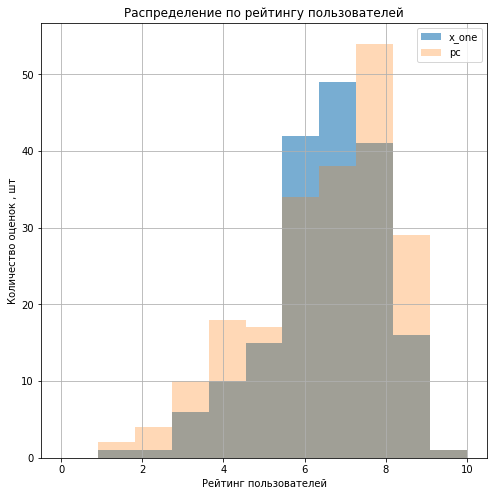

In [122]:
plt.figure(figsize=(8,8))

x = x_one
y = pc

bins = np.linspace(0, 10, 12)
plt.hist(x, bins, alpha=0.6, label='x_one')
plt.hist(y, bins, alpha=0.3, label='pc')

plt.grid(True)
plt.title('Распределение по рейтингу пользователей')
plt.legend(loc='upper right')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество оценок , шт')
plt.show()

##### Распеределение непохоже на нормальное, оно скошено вправо. Значит нам стоит провести стат.тест Левене, чтобы понять, с каким параметром equal_var считать p-value

In [123]:
from scipy.stats import levene

stat, p = levene(x_one, pc)
p

0.011715438973335107

In [124]:
[np.var(x, ddof=1) for x in [x_one, pc]]

[1.9069968429360702, 2.7777224332817414]

##### Малое значение p предполагает, что совокупности не имеют одинаковых дисперсий. Значит мы будем использововать `equal_var=False`

In [125]:
from scipy import stats as st
import numpy as np

x_one = df_analysis.query('platform =="XOne" and user_score > 0')['user_score']
pc = df_analysis.query('platform =="PC" and user_score > 0')['user_score']

print('Средняя оценка пользователей xOne: ', x_one.mean())  
print('Средняя оценка пользователей pc: ', pc.mean())


alpha = .05

results = st.ttest_ind(
    x_one, 
    pc,
    equal_var = False)

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средняя оценка пользователей xOne:  6.52142857142857
Средняя оценка пользователей pc:  6.438647342995167
p-значение: 0.5926118514134862
Не получилось отвергнуть нулевую гипотезу


### Гипотеза №2:  <a id="hip_2"></a>
- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые;
- Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;
- Уровень значимости: α == 0.05;
- Посчитаем p-value, используя ttest из библиотеки scipy для сравнения среди двух выборок;

- Если p-value будет меньше выбранного уровня значимости α == 0.05, то нулевую гипотезу о равенстве средней выручки двух разных тарифов отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

##### Для начала посмотрим на распределение

In [126]:
df_analysis['user_score'] = df_analysis['user_score'].fillna(0)

In [127]:
action = df_analysis.query('genre =="Action" and user_score > 0')['user_score']
sports = df_analysis.query('genre =="Sports" and user_score > 0')['user_score']

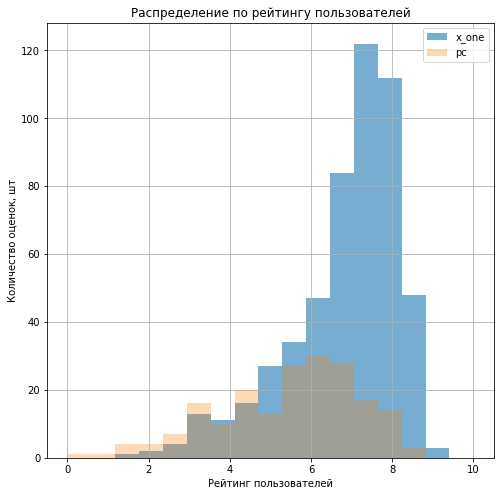

In [128]:
plt.figure(figsize=(8,8))

x = action
y = sports

bins = np.linspace(0, 10, 18)
plt.hist(x, bins, alpha=0.6, label='x_one')
plt.hist(y, bins, alpha=0.3, label='pc')

plt.grid(True)
plt.title('Распределение по рейтингу пользователей')
plt.legend(loc='upper right')
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Количество оценок, шт')
plt.show()

##### Распеределение непохоже на нормальное, оно скошено вправо. Значит нам стоит провести стат.тест Левене, чтобы понять с каким параметром equal_var считать p-value

In [129]:
from scipy.stats import levene

stat, p = levene(action, sports)
p

1.6619051463586425e-05

In [130]:
[np.var(x, ddof=1) for x in [action, sports]]

[1.8908259746325535, 3.022890298704733]

##### Малое значение p предполагает, что совокупности не имеют одинаковых дисперсий. Значит мы будем использововать `equal_var=False`

In [131]:
from scipy import stats as st
import numpy as np

action = df_analysis.query('genre =="Action" and user_score > 0')['user_score']
sports = df_analysis.query('genre =="Sports" and user_score > 0')['user_score']

print('Средняя оценка пользователей жанра Action: ', action.mean())  
print('Средняя оценка пользователей жанра Sports: ', sports.mean())


alpha = .05

results = st.ttest_ind(
    action, 
    sports,
    equal_var = False)

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средняя оценка пользователей жанра Action:  6.828244274809171
Средняя оценка пользователей жанра Sports:  5.455897435897437
p-значение: 3.551295319559386e-20
Отвергаем нулевую гипотезу


## V. Общий вывод:<a id="final_conc"></a>

### Выводы об исходных данных:
- Мы обнаружили много пропусков в столбцах `Critic_Score`,`User_Score` и `Rating`. Их нужно изучить внимательнее, чтобы понять природу их возникновения. Есть предположение, что это в основном старые игры,в которые играли, когда никаких рейтингов не было. Проверим эту догадку в следующем блоке;
- В столбце`User_Score` есть значения tbd. Мы предполагаем, что это несформированный средний бал оценки. Скорее всего у этих игр слишком мало оценок, и выводить среднее из 3х-4х оценок будет нерелевантным. По рейтингу видно, что в выборку попали игры категорий:
 - «E» («Everyone») -«Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; 
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови;
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
Мы не  думаем, что дети часто пишут отзывы и проставляют оценки по тем играм, в которые играют.
Также на это повлиял период, когда эти игры в основном продавались. Мы предпологаем, что в первой половине нулевых не было столь популярно рейтинговать игры и писать по ним отзывы.
Мы решили заменить tbd на пропуски, чтобы можно было изменить формат столбца на числовой. Это нужно было для дальнейших вычислений.

### Вывод по пропускам в столбцах `critic_score`,	`user_score`  и `rating` :
- Оценок от критиков и пользователей не имеют игры, которые плохо продавались, были непопулярны и были адаптированы под меньшее кол-во платфоором, что вполне логично;
- Зависимости отсутствия оценок от года выпуска игры нет;
- Аналогичные выводы можно сделать и по пропускам в столбце `rating`.

### Вывод по количеству игр, выпущенных в разные годы: 
- Мы наблюдаем стремтильеный рост производства игр с начала 90х до 2009-ого года, после чего трендо ломается, и идет резкое снижение вплоть до 2012;
- В данном разрезе нам видится наиболее релевантным для прогноза период с 2012 по 2016.

### Вывод по платформам: 
- Самый большой объем проданных копий за всю ретроспективу приходится на всю линейку PS(1,2,3,4), X360, DS и Wii;
- Жизненный цикл платформы около 10 лет. Пиковые значения держатся 4-5 лет.

### Вывод по Актуальному периоду: 
- Мы оставили данные для дальнейшего анализа с 2012 по 2016 год включительно. Это связано с тем, что за эти годы стабилизировлася тренд по колчиесту проданных копий, и это примерно половина среднего срока жизненного цикла платформы;
- Данные для анализа мы сохранили в переменную df_analysis.

### Вывод по актуальным лидерам: 
- Лидерами продаж являются: PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, DS, PSP;
- Несмотря на разношерстный топ, у большинства из платформ точек роста больше нет, так как их жизненный цикл подходит к концу. К тому же общий снижающийся тренд не позволяет выделить много лидеров.
- Несмотря на спад в 2016 году наиболее привлекательными выглядят свежие платформы: PS4 и X0ne. Их продажи неплохо росли до 2016 года. По одному году снижения судить не стоит, поэтому выделим именно их.


### Вывод по зависимости количества продаж от отзывов:
- По более популярным платформам зависимость есть. Не всегда строго линейная, но есть. Отсюда не всегда выский коэффециент корреляции Пирсона. 
    - Для PSP4: корреляция с рейтингом пользователей 0,31, а с рейтингом критиков 0,41;
    - Для X0ne: корреляция с рейтингом пользователей 0,06, а с рейтингом критиков 0,41;
    - Схожую завимимость можно наблюдать у PS3, X360 и PC;
    - А вот у нишевых портативных PSV и PSP такой зависимости нет из-за недостаточного кол-ва отзывов;
- По таким плаформам как Wii, PSP и DS очень мало отзывов, поэтому связь проследить тяжело, а зачасутю просто невозможно. Это еще раз подвтерждает корректность нашего выбора для прогноза в пользу более актуальных платформ, таких как PSP4 и XOne.

### Вывод по зависимости количества продаж от жанра: 
- Топ 5 самых популярных жанров: Action, Shooter, Role-Playing, Sports и Misc;
- Топ 5 самых непопулярных жанров: Fighting, Simulation, Adventure, Strategy и Puzzle;	
- Зависимости от рейтингов пользователй и критиков нет. Во всех жанрах есть любимые и нелюбимые игры;
- Есть завимисомть от платформ. Самые популярные по нашему мнению плафтормы PSP4 и XOne, а также их прародители PS3 и X360 плотно занимают нишу самых популярных жанров. Можем предположить, что есть игры популярных жанров, которые выходят только для этих платформ и не масштабируются для других;
- Аналогичный вывод можно сделать и о непопулярных жанрах. Нишу Fighting, Simulation, Adventure, Strategy, Puzzle знаимают в основном Wii, DS6 и PC.

### Вывод по топ 5 популярных плтатформ в регионах: 
- Самой популярной платформой во всех регионах является PS4 (по сумме продаж);
- Самой непопулярной в нашем топе оказалась WiiU;
- Рынки Северной Америки и Европы очень схожи по сегментам, чего нельзя сказаать о Японском рынке;
- В Европе и Северной Америке популярны PS3, PS4, X360, X0ne и чуть менее 3DS;
- В Северной Америке играют больше в X360 и XOne, а в Европе больше в PS3 и PS4;
- В Японии лидером является 3DS;
- В WiiU и PSV играют только в Японии.

### Общее резюме:
Мы считаем, что нам стоит сосредоточиться на продажах игр жанров Action, Shooter и Role-Playing для XOne И PS4. 

### Рекомендации:
Мы предполагаем, что помимо игр нам стоит расширить ассортимент и сферу услуг. Мы заметили точки роста популяности XOne и PS4. Почему бы нам не начать и продавать, и ремонтировать сами приставки...